#  Customer Segmentation Report for Arvato Financial Solutions

In financial domain, data science plays a major role in making the right business decisions based on data. In this project, the demogaphics data collected for almost 900 thousends citizens in Germany will used for segmentation of the users and prediction of the most-likely customers to response to mail-order company.

This project is divided into Three parts as follows.
- Part I: General Population and customers segmentation (Unsupervised Modeling)
- Part II: Customers response prediction (Supervised Modeling)
- Part III: Kaggle Comprtition Submition <br><br>

In each part of the project we will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) as shown below.

    1.	Business understanding.
    2.	Data understanding.
    3.	Data preparation.
    4.	Modeling.
    5.	Evaluation.
    6.	Deployment.


## Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=';', low_memory=False)
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=';', low_memory=False)

In [3]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


## Exploratory Data Analysis

The extra three columns ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'] in customers data set will be dropped.

In [5]:
np.setdiff1d(customers.columns,azdias.columns)

array(['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], dtype=object)

In [6]:
customers_extra_cols =np.setdiff1d(customers.columns,azdias.columns)
customers_final = customers.drop(columns=customers_extra_cols)
customers_final.shape

(191652, 366)

The features of both data sets can be handeled in groups. Each group of features has a common characteristics, so we can explore and clean group by group.

In [7]:
group_name =[]
for col in azdias.columns:
    group_name.append(col.split('_')[0])
group_name_s=pd.Series(group_name)
group_counts = group_name_s.value_counts()

Text(0.5, 1.0, 'Count of columns in each column group')

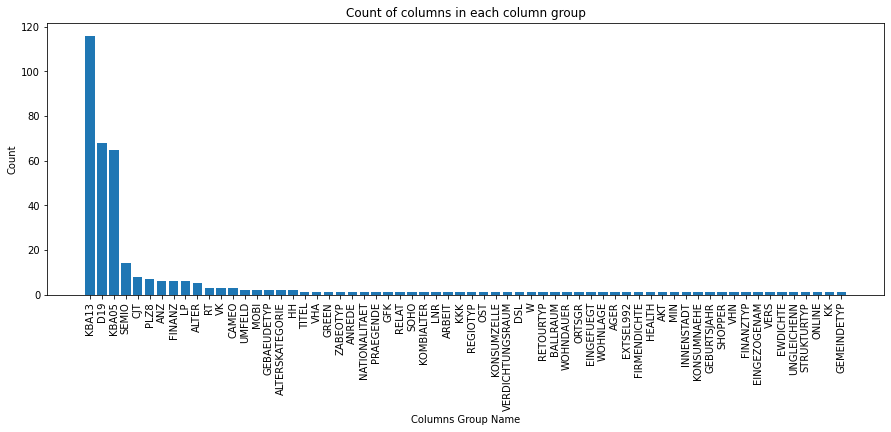

In [8]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(x=group_counts.index,height=group_counts.values)
plt.xlabel("Columns Group Name")
plt.ylabel("Count")
plt.title("Count of columns in each column group")

Creating a dictionary for the columns of each group.

In [9]:
col_group_dict={}
for g in group_counts.index:
    col_group_dict["col_{}".format(g)] = [col for col in azdias.columns if (g == col.split('_')[0])]

In [10]:
col_group_dict

{'col_KBA13': ['KBA13_ALTERHALTER_30',
  'KBA13_ALTERHALTER_45',
  'KBA13_ALTERHALTER_60',
  'KBA13_ALTERHALTER_61',
  'KBA13_ANTG1',
  'KBA13_ANTG2',
  'KBA13_ANTG3',
  'KBA13_ANTG4',
  'KBA13_ANZAHL_PKW',
  'KBA13_AUDI',
  'KBA13_AUTOQUOTE',
  'KBA13_BAUMAX',
  'KBA13_BJ_1999',
  'KBA13_BJ_2000',
  'KBA13_BJ_2004',
  'KBA13_BJ_2006',
  'KBA13_BJ_2008',
  'KBA13_BJ_2009',
  'KBA13_BMW',
  'KBA13_CCM_0_1400',
  'KBA13_CCM_1000',
  'KBA13_CCM_1200',
  'KBA13_CCM_1400',
  'KBA13_CCM_1401_2500',
  'KBA13_CCM_1500',
  'KBA13_CCM_1600',
  'KBA13_CCM_1800',
  'KBA13_CCM_2000',
  'KBA13_CCM_2500',
  'KBA13_CCM_2501',
  'KBA13_CCM_3000',
  'KBA13_CCM_3001',
  'KBA13_FAB_ASIEN',
  'KBA13_FAB_SONSTIGE',
  'KBA13_FIAT',
  'KBA13_FORD',
  'KBA13_GBZ',
  'KBA13_HALTER_20',
  'KBA13_HALTER_25',
  'KBA13_HALTER_30',
  'KBA13_HALTER_35',
  'KBA13_HALTER_40',
  'KBA13_HALTER_45',
  'KBA13_HALTER_50',
  'KBA13_HALTER_55',
  'KBA13_HALTER_60',
  'KBA13_HALTER_65',
  'KBA13_HALTER_66',
  'KBA13_HERST_ASIE

### Functions to be used in EDA

In [11]:
missing_values_dict={}
def impute_missing_values(columns,value):
    '''A fuction to replace the missing values with a certain value.
    The function handles both data sets (AZDIAS and customers)
    INPUTS:
    columns: a string or list of strings of the columns names to be handled.
    values: Integer or string of the value to replace the missing values
    OUTPUT: None
    '''
    azdias[columns] = azdias[columns].fillna(value)
    customers_final[columns] = customers_final[columns].fillna(value)
    if type(columns)==str: 
        missing_values_dict[columns]=value
    else:
        for col in columns: missing_values_dict[col]=value

In [12]:
def histogram_plot(col_group):
    '''A function to display the distograms of a group of features in the dataa sets.
    Input: A string of the columns group
    Output: None
    '''
    
    size=len(col_group_dict[col_group])
    if size > 8: 
        plt.figure(figsize=(10,20))
    elif size < 4:
        plt.figure(figsize=(10,10))
    else:
        plt.figure(figsize=(10,15))
    for i,col in enumerate(col_group_dict[col_group]):
        plt.subplot((size//2)+1,2,i+1)
        plt.hist(azdias[col],bins=10)
        plt.title(col)

In [13]:
def fillna_mode(columns):
    '''A function to fill the missing values in a columns with the mode value in the column.
    Input: A list or a string of the columns names.
    Output: None
    '''
    col_list=[]
    if type(columns)==str:
        col_list.append(columns)
    else:
        col_list = columns
    for col in col_list:
        col_mode = azdias[col].value_counts(ascending=False).index[0]
        azdias[col] = azdias[col].fillna(col_mode)
        customers_final[col] = customers_final[col].fillna(col_mode)
    for col in col_list: missing_values_dict[col]=col_mode

In [14]:
def cat_features_mapping(feature):
    '''
    A function to map the categorical values to numeric values.
    Inputs:
    feature: the name of the categorical feature.
    Output: None
    '''
    map_dict = dict()
    i = 1
    for cat in azdias[feature].unique():
        if cat == '-1': 
            map_dict[cat] = -1
        else:
            map_dict[cat] = i
        i = i+1
    print(map_dict)
    azdias[feature] = azdias[feature].replace(map_dict)
    customers_final[feature] = customers_final[feature].replace(map_dict)


### KBA13 columns

In [15]:
azdias[col_group_dict['col_KBA13']].isnull().sum()

KBA13_ALTERHALTER_30    105800
KBA13_ALTERHALTER_45    105800
KBA13_ALTERHALTER_60    105800
KBA13_ALTERHALTER_61    105800
KBA13_ANTG1             105800
                         ...  
KBA13_VORB_1            105800
KBA13_VORB_1_2          105800
KBA13_VORB_2            105800
KBA13_VORB_3            105800
KBA13_VW                105800
Length: 116, dtype: int64

In [16]:
customers_final[col_group_dict['col_KBA13']].isnull().sum()

KBA13_ALTERHALTER_30    51281
KBA13_ALTERHALTER_45    51281
KBA13_ALTERHALTER_60    51281
KBA13_ALTERHALTER_61    51281
KBA13_ANTG1             51281
                        ...  
KBA13_VORB_1            51281
KBA13_VORB_1_2          51281
KBA13_VORB_2            51281
KBA13_VORB_3            51281
KBA13_VW                51281
Length: 116, dtype: int64

We see that the count of the missing values is constant for all features in the group.

In [17]:
((azdias[col_group_dict['col_KBA13']].isnull()).sum(axis=1)==116).sum()

105800

In [18]:
((customers_final[col_group_dict['col_KBA13']].isnull()).sum(axis=1)==116).sum()

51281

Also, it is noticed that if the customer has a missing value in KBA13 group, all enties for all 116 columns are missing. This might be because the users did not provide this information in the survey.

In [19]:
(azdias[col_group_dict['col_KBA13']] == -1).sum().sort_values(ascending=False)

KBA13_VW                0
KBA13_HALTER_45         0
KBA13_CCM_3000          0
KBA13_CCM_3001          0
KBA13_FAB_ASIEN         0
                       ..
KBA13_KW_70             0
KBA13_KW_80             0
KBA13_KW_90             0
KBA13_MAZDA             0
KBA13_ALTERHALTER_30    0
Length: 116, dtype: int64

In [20]:
(customers_final[col_group_dict['col_KBA13']] == -1).sum().sort_values(ascending=False)

KBA13_VW                0
KBA13_HALTER_45         0
KBA13_CCM_3000          0
KBA13_CCM_3001          0
KBA13_FAB_ASIEN         0
                       ..
KBA13_KW_70             0
KBA13_KW_80             0
KBA13_KW_90             0
KBA13_MAZDA             0
KBA13_ALTERHALTER_30    0
Length: 116, dtype: int64

In DIAS attributes sheet, we see that -1 in KBA13 group refers to unknow data, but none of the values in both data sets is -1. As a conclusion, we can fill the missing values with -1.

In [21]:
impute_missing_values(col_group_dict['col_KBA13'],-1)

In [22]:
azdias[col_group_dict['col_KBA13']].isnull().sum()

KBA13_ALTERHALTER_30    0
KBA13_ALTERHALTER_45    0
KBA13_ALTERHALTER_60    0
KBA13_ALTERHALTER_61    0
KBA13_ANTG1             0
                       ..
KBA13_VORB_1            0
KBA13_VORB_1_2          0
KBA13_VORB_2            0
KBA13_VORB_3            0
KBA13_VW                0
Length: 116, dtype: int64

In [23]:
customers_final[col_group_dict['col_KBA13']].isnull().sum()

KBA13_ALTERHALTER_30    0
KBA13_ALTERHALTER_45    0
KBA13_ALTERHALTER_60    0
KBA13_ALTERHALTER_61    0
KBA13_ANTG1             0
                       ..
KBA13_VORB_1            0
KBA13_VORB_1_2          0
KBA13_VORB_2            0
KBA13_VORB_3            0
KBA13_VW                0
Length: 116, dtype: int64

## D19 Features

In [24]:
group_counts

KBA13          116
D19             68
KBA05           65
SEMIO           14
CJT              8
              ... 
UNGLEICHENN      1
STRUKTURTYP      1
ONLINE           1
KK               1
GEMEINDETYP      1
Length: 64, dtype: int64

In [25]:
azdias[col_group_dict['col_D19']].isnull().sum().sort_values(ascending=False)[:10]

D19_LETZTER_KAUF_BRANCHE       257113
D19_VERSAND_ONLINE_QUOTE_12    257113
D19_LOTTO                      257113
D19_GESAMT_ONLINE_QUOTE_12     257113
D19_SOZIALES                   257113
D19_BANKEN_ONLINE_QUOTE_12     257113
D19_TELKO_ONLINE_QUOTE_12      257113
D19_KONSUMTYP                  257113
D19_VERSI_ONLINE_QUOTE_12      257113
D19_FREIZEIT                        0
dtype: int64

We have 9 features with missing values in D19 group. For D19_LOTTO, D19_TELKO_ONLINE_QUOTE_12 and D19_VERSI_ONLINE_QUOTE_12 features they refer to the transactions for these categories in the last 12 months. and '0' values means that there is no transactions known, so we can fill the missing values with 0 in these features.

In [26]:
impute_missing_values(['D19_LOTTO', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12'],0)

In [27]:
azdias[['D19_LOTTO', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12']].isnull().sum()

D19_LOTTO                    0
D19_TELKO_ONLINE_QUOTE_12    0
D19_VERSI_ONLINE_QUOTE_12    0
dtype: int64

In [28]:
customers_final[['D19_LOTTO', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12']].isnull().sum()

D19_LOTTO                    0
D19_TELKO_ONLINE_QUOTE_12    0
D19_VERSI_ONLINE_QUOTE_12    0
dtype: int64

### D19_BANKEN_OLINE_QUOTE_12

We see that D19_BANKEN_ONLINE_DATUM refers to the online transactions in last 12 months and the total customers with 'No transaction is known' is 726982. Those customers has values of 0 and NaN in D19_BANKEN_ONLINE_QUOTE_12 columns, which means that the customers with unknown transaction in the last 12 months are either 0 or NaN in D19_BANKEN_ONLINE_QUOTE_12. so, we can replace the NaN values in D19_BANKEN_ONLINE_QUOTE_12 with 0.

In [29]:
(azdias['D19_BANKEN_ONLINE_DATUM'] == 10).sum()

726982

In [30]:
azdias['D19_BANKEN_ONLINE_QUOTE_12'][azdias['D19_BANKEN_ONLINE_DATUM']==10].isnull().sum()

257113

In [31]:
azdias['D19_BANKEN_ONLINE_QUOTE_12'][azdias['D19_BANKEN_ONLINE_DATUM']==10].value_counts()

0.0    469869
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: int64

In [32]:
impute_missing_values('D19_BANKEN_ONLINE_QUOTE_12',0)

In [33]:
missing_values_dict

{'KBA13_ALTERHALTER_30': -1,
 'KBA13_ALTERHALTER_45': -1,
 'KBA13_ALTERHALTER_60': -1,
 'KBA13_ALTERHALTER_61': -1,
 'KBA13_ANTG1': -1,
 'KBA13_ANTG2': -1,
 'KBA13_ANTG3': -1,
 'KBA13_ANTG4': -1,
 'KBA13_ANZAHL_PKW': -1,
 'KBA13_AUDI': -1,
 'KBA13_AUTOQUOTE': -1,
 'KBA13_BAUMAX': -1,
 'KBA13_BJ_1999': -1,
 'KBA13_BJ_2000': -1,
 'KBA13_BJ_2004': -1,
 'KBA13_BJ_2006': -1,
 'KBA13_BJ_2008': -1,
 'KBA13_BJ_2009': -1,
 'KBA13_BMW': -1,
 'KBA13_CCM_0_1400': -1,
 'KBA13_CCM_1000': -1,
 'KBA13_CCM_1200': -1,
 'KBA13_CCM_1400': -1,
 'KBA13_CCM_1401_2500': -1,
 'KBA13_CCM_1500': -1,
 'KBA13_CCM_1600': -1,
 'KBA13_CCM_1800': -1,
 'KBA13_CCM_2000': -1,
 'KBA13_CCM_2500': -1,
 'KBA13_CCM_2501': -1,
 'KBA13_CCM_3000': -1,
 'KBA13_CCM_3001': -1,
 'KBA13_FAB_ASIEN': -1,
 'KBA13_FAB_SONSTIGE': -1,
 'KBA13_FIAT': -1,
 'KBA13_FORD': -1,
 'KBA13_GBZ': -1,
 'KBA13_HALTER_20': -1,
 'KBA13_HALTER_25': -1,
 'KBA13_HALTER_30': -1,
 'KBA13_HALTER_35': -1,
 'KBA13_HALTER_40': -1,
 'KBA13_HALTER_45': -1,
 'KBA13_

The same approach can be applied to D19_GESAMT_ONLINE_QUOTE_12.

In [34]:
(azdias['D19_GESAMT_ONLINE_DATUM'] == 10).sum()

450995

In [35]:
azdias['D19_GESAMT_ONLINE_QUOTE_12'][azdias['D19_GESAMT_ONLINE_DATUM']==10].isnull().sum()

257113

In [36]:
azdias['D19_GESAMT_ONLINE_QUOTE_12'][azdias['D19_GESAMT_ONLINE_DATUM']==10].value_counts()

0.0    193882
Name: D19_GESAMT_ONLINE_QUOTE_12, dtype: int64

In [37]:
impute_missing_values('D19_GESAMT_ONLINE_QUOTE_12',0)

### D19_VERSAND_ONLINE_QUOTE_12 Column:

In D19_VERSAND_ONLINE_QUOTE_12, Not all the customers with no transactions known in GESAMT_ONLINE_DATUM has 0 or NaN values in D19_VERSAND_ONLINE_QUOTE_12 but the majority with 0 value, so we can fill the NaN values with 0 in this column too.

In [38]:
(azdias['D19_VERSAND_ONLINE_DATUM']==10).sum()

494464

In [39]:
azdias['D19_VERSAND_ONLINE_QUOTE_12'][azdias['D19_VERSAND_ONLINE_DATUM']==10].isnull().sum()

257113

In [40]:
azdias['D19_VERSAND_ONLINE_QUOTE_12'][azdias['D19_VERSAND_ONLINE_DATUM']==10].value_counts()

0.0     235708
10.0      1578
5.0         41
3.0         13
7.0          5
2.0          3
1.0          2
8.0          1
Name: D19_VERSAND_ONLINE_QUOTE_12, dtype: int64

In [41]:
impute_missing_values('D19_VERSAND_ONLINE_QUOTE_12',0)

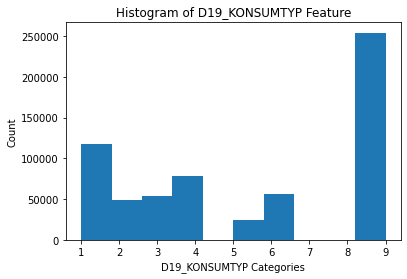

In [42]:
plt.xlabel("D19_KONSUMTYP Categories")
plt.ylabel("Count")
plt.title("Histogram of D19_KONSUMTYP Feature")
plt.hist(azdias['D19_KONSUMTYP']);

In [43]:
azdias['D19_KONSUMTYP_MAX'].value_counts()

8    260285
9    257113
1    144570
2     91423
4     75752
3     62078
Name: D19_KONSUMTYP_MAX, dtype: int64

In [44]:
azdias['D19_KONSUMTYP'].isnull().sum()

257113

In [45]:
azdias['D19_KONSUMTYP_MAX'][azdias['D19_KONSUMTYP'].isnull()].value_counts()

9    257113
Name: D19_KONSUMTYP_MAX, dtype: int64

For KONSUMTYP columns we see that the majority of customers are inactive and after studying the relation between KONSUMTYP and KONSUMTYP_MAX, the customers with NaN values in KONSUMTYP have 9 value in KONSUMTYP_MAX. So, we can fill the missing values with 9.

In [46]:
impute_missing_values('D19_KONSUMTYP',9)

For 'D19_LETZER_KAUF_BRANCHE' and D19_SOZIALES, they are not mentioned in the excel sheets but the D19_LETZER_KAUF_BRANCHE column refer to the last purchase category done by the customer and the mode of this feature is D19_UNBEKANNT which is 'unknown', so the NaN values can be filled with D19_UNBEKANNT and this categorical feature will be handeled later in Categorical features.

In [47]:
azdias['D19_LETZTER_KAUF_BRANCHE'].value_counts()

D19_UNBEKANNT             195338
D19_VERSICHERUNGEN         57734
D19_SONSTIGE               44722
D19_VOLLSORTIMENT          34812
D19_SCHUHE                 32578
D19_BUCH_CD                28754
D19_VERSAND_REST           26034
D19_DROGERIEARTIKEL        24072
D19_BANKEN_DIREKT          23273
D19_BEKLEIDUNG_REST        21796
D19_HAUS_DEKO              20858
D19_TELKO_MOBILE           14447
D19_ENERGIE                12084
D19_TELKO_REST             11472
D19_BANKEN_GROSS           10550
D19_BEKLEIDUNG_GEH         10272
D19_KINDERARTIKEL           7301
D19_FREIZEIT                7257
D19_TECHNIK                 7002
D19_LEBENSMITTEL            6458
D19_BANKEN_REST             5247
D19_RATGEBER                4931
D19_NAHRUNGSERGAENZUNG      4061
D19_DIGIT_SERV              3577
D19_REISEN                  3122
D19_TIERARTIKEL             2578
D19_SAMMELARTIKEL           2443
D19_HANDWERK                2227
D19_WEIN_FEINKOST           2164
D19_GARTEN                  1646
D19_BANKEN

In [48]:
impute_missing_values('D19_LETZTER_KAUF_BRANCHE','D19_UNBEKANNT')

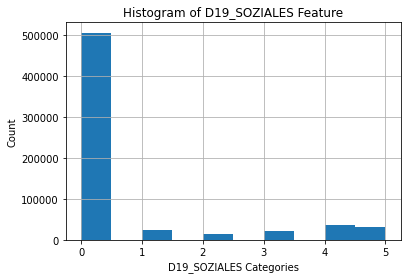

In [49]:
plt.xlabel("D19_SOZIALES Categories")
plt.ylabel("Count")
plt.title("Histogram of D19_SOZIALES Feature")
azdias['D19_SOZIALES'].hist();

For D19_SOZIALES, the missing values can be filled with the mode value (0).

In [50]:
fillna_mode('D19_SOZIALES') 

In [51]:
missing_values_dict

{'KBA13_ALTERHALTER_30': -1,
 'KBA13_ALTERHALTER_45': -1,
 'KBA13_ALTERHALTER_60': -1,
 'KBA13_ALTERHALTER_61': -1,
 'KBA13_ANTG1': -1,
 'KBA13_ANTG2': -1,
 'KBA13_ANTG3': -1,
 'KBA13_ANTG4': -1,
 'KBA13_ANZAHL_PKW': -1,
 'KBA13_AUDI': -1,
 'KBA13_AUTOQUOTE': -1,
 'KBA13_BAUMAX': -1,
 'KBA13_BJ_1999': -1,
 'KBA13_BJ_2000': -1,
 'KBA13_BJ_2004': -1,
 'KBA13_BJ_2006': -1,
 'KBA13_BJ_2008': -1,
 'KBA13_BJ_2009': -1,
 'KBA13_BMW': -1,
 'KBA13_CCM_0_1400': -1,
 'KBA13_CCM_1000': -1,
 'KBA13_CCM_1200': -1,
 'KBA13_CCM_1400': -1,
 'KBA13_CCM_1401_2500': -1,
 'KBA13_CCM_1500': -1,
 'KBA13_CCM_1600': -1,
 'KBA13_CCM_1800': -1,
 'KBA13_CCM_2000': -1,
 'KBA13_CCM_2500': -1,
 'KBA13_CCM_2501': -1,
 'KBA13_CCM_3000': -1,
 'KBA13_CCM_3001': -1,
 'KBA13_FAB_ASIEN': -1,
 'KBA13_FAB_SONSTIGE': -1,
 'KBA13_FIAT': -1,
 'KBA13_FORD': -1,
 'KBA13_GBZ': -1,
 'KBA13_HALTER_20': -1,
 'KBA13_HALTER_25': -1,
 'KBA13_HALTER_30': -1,
 'KBA13_HALTER_35': -1,
 'KBA13_HALTER_40': -1,
 'KBA13_HALTER_45': -1,
 'KBA13_

In [52]:
azdias['D19_SOZIALES'].value_counts()

0.0    762941
4.0     36514
5.0     30414
1.0     25128
3.0     21483
2.0     14741
Name: D19_SOZIALES, dtype: int64

## KBA05 columns

We see that almost all columns in KBA05 group have the same count of missing values(133324). so, We will see if the missing values for the whole 65 columns for each customer.

In [53]:
azdias[col_group_dict['col_KBA05']].isnull().sum().sort_values(ascending=False)

KBA05_ZUL4         133324
KBA05_ZUL3         133324
KBA05_KRSVAN       133324
KBA05_KRSOBER      133324
KBA05_KRSKLEIN     133324
                    ...  
KBA05_MAXBJ        133324
KBA05_MAXAH        133324
KBA05_ALTER1       133324
KBA05_MODTEMP       93148
KBA05_HERSTTEMP     93148
Length: 65, dtype: int64

In [54]:
(azdias[col_group_dict['col_KBA05']].isnull().sum(axis=1) == 65).sum()

93148

In [55]:
all_KBA05_null_cust = azdias[col_group_dict['col_KBA05']].isnull().sum(axis=1) == 65

In [56]:
all_KBA05_null_cust1 = customers_final[col_group_dict['col_KBA05']].isnull().sum(axis=1) == 65

We can see that only 93148 customers out of 133324 customers have the missing values in all 65 columns. As per values attributes sheet, the values for 'unkown' are -1,9 , -1,0 or -1.

For columns KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3 and KBA05_ANTG4, we can replace missing values with -1 as unkown attribute.

In [57]:
[azdias[f'KBA05_ANTG{i}'].value_counts() for i in range(1,5)]

[0.0    261049
 1.0    161224
 2.0    126725
 3.0    117762
 4.0     91137
 Name: KBA05_ANTG1, dtype: int64, 0.0    292538
 1.0    163751
 2.0    138273
 3.0    134455
 4.0     28880
 Name: KBA05_ANTG2, dtype: int64, 0.0    511545
 1.0     92748
 2.0     80234
 3.0     73370
 Name: KBA05_ANTG3, dtype: int64, 0.0    600171
 1.0     83591
 2.0     74135
 Name: KBA05_ANTG4, dtype: int64]

For KBA05_GBZ and KBA05_BAUMAX, the unknown values are '0', so we can fill missing values with 0.

In [58]:
azdias['KBA05_BAUMAX'].value_counts()

0.0    343200
1.0    208417
5.0     98923
3.0     59955
4.0     37718
2.0      9684
Name: KBA05_BAUMAX, dtype: int64

In [59]:
azdias['KBA05_GBZ'].value_counts()

3.0    197833
5.0    158971
4.0    155301
2.0    138528
1.0    107264
Name: KBA05_GBZ, dtype: int64

In [60]:
fillna_dict = {'KBA05_ANTG1':-1,'KBA05_ANTG2':-1,'KBA05_ANTG3':-1, 'KBA05_ANTG4':-1,'KBA05_GBZ':0, 'KBA05_BAUMAX':0}

In [61]:
azdias[col_group_dict['col_KBA05']].isnull().sum(axis=1).value_counts()

0     757897
65     93148
63     40176
dtype: int64

We see that the remaining 40176 entries with NaN values in KBA05 group have only values for HERSTTEMP and MODTEMP columns. The majority of their values are 5.0 with represents new building. It might be useful to study the users with new buildings in both columns to get the correct expected missing values for the 40176 customers.

In [62]:
All_5_HERSTT_MODTEMP =azdias.query("KBA05_HERSTTEMP == 5 and KBA05_MODTEMP ==5")

In [63]:
All_5_HERSTT_MODTEMP[col_group_dict['col_KBA05']].isnull().sum().value_counts()

38041    63
0         2
dtype: int64

We see that the other columns except HERSTTEMP and MODTEMP in KBA05 group have all NaN values, so the missing values can be replaced with 'unkown' corrsponding value.

In [64]:
remaining_KBA05_cols = col_group_dict['col_KBA05'] - fillna_dict.keys()

We need to find the columns with unkown value -1 and 9.

In [65]:
KBA05_null_unknown_1=set()
KBA05_null_unknown_9=set()
for col in remaining_KBA05_cols:
    azdias[col].apply(lambda x:KBA05_null_unknown_1.add(col) if x==-1 else False)
    azdias[col].apply(lambda x:KBA05_null_unknown_9.add(col) if x==9 else False)

In [66]:
KBA05_null_unknown_1,KBA05_null_unknown_9

(set(),
 {'KBA05_ALTER1',
  'KBA05_ALTER2',
  'KBA05_ALTER3',
  'KBA05_ALTER4',
  'KBA05_ANHANG',
  'KBA05_AUTOQUOT',
  'KBA05_CCM1',
  'KBA05_CCM2',
  'KBA05_CCM3',
  'KBA05_CCM4',
  'KBA05_DIESEL',
  'KBA05_FRAU',
  'KBA05_HERST1',
  'KBA05_HERST2',
  'KBA05_HERST3',
  'KBA05_HERST4',
  'KBA05_HERST5',
  'KBA05_HERSTTEMP',
  'KBA05_KRSAQUOT',
  'KBA05_KRSHERST1',
  'KBA05_KRSHERST2',
  'KBA05_KRSHERST3',
  'KBA05_KRSKLEIN',
  'KBA05_KRSOBER',
  'KBA05_KRSVAN',
  'KBA05_KRSZUL',
  'KBA05_KW1',
  'KBA05_KW2',
  'KBA05_KW3',
  'KBA05_MAXAH',
  'KBA05_MAXBJ',
  'KBA05_MAXHERST',
  'KBA05_MAXSEG',
  'KBA05_MAXVORB',
  'KBA05_MOD1',
  'KBA05_MOD2',
  'KBA05_MOD3',
  'KBA05_MOD4',
  'KBA05_MOD8',
  'KBA05_MOTOR',
  'KBA05_MOTRAD',
  'KBA05_SEG1',
  'KBA05_SEG10',
  'KBA05_SEG2',
  'KBA05_SEG3',
  'KBA05_SEG4',
  'KBA05_SEG5',
  'KBA05_SEG6',
  'KBA05_SEG7',
  'KBA05_SEG8',
  'KBA05_SEG9',
  'KBA05_VORB0',
  'KBA05_VORB1',
  'KBA05_VORB2',
  'KBA05_ZUL1',
  'KBA05_ZUL2',
  'KBA05_ZUL3',
  'K

In [67]:
remaining_KBA05_cols - KBA05_null_unknown_9

{'KBA05_MODTEMP'}

We see that all remaining columns has 9 value as a reference to 'unknown' except KBA_MODTEMP which has no unkown values. So we can replace the missing values in these columns with 9.

In [68]:
for col in remaining_KBA05_cols: fillna_dict[col] = 9

In [69]:
fillna_dict

{'KBA05_ANTG1': -1,
 'KBA05_ANTG2': -1,
 'KBA05_ANTG3': -1,
 'KBA05_ANTG4': -1,
 'KBA05_GBZ': 0,
 'KBA05_BAUMAX': 0,
 'KBA05_VORB2': 9,
 'KBA05_SEG10': 9,
 'KBA05_HERST2': 9,
 'KBA05_DIESEL': 9,
 'KBA05_ALTER3': 9,
 'KBA05_KW2': 9,
 'KBA05_KRSHERST1': 9,
 'KBA05_CCM1': 9,
 'KBA05_ALTER1': 9,
 'KBA05_MOD8': 9,
 'KBA05_KRSKLEIN': 9,
 'KBA05_KRSHERST2': 9,
 'KBA05_KW3': 9,
 'KBA05_SEG7': 9,
 'KBA05_MAXBJ': 9,
 'KBA05_MOD4': 9,
 'KBA05_ZUL4': 9,
 'KBA05_CCM3': 9,
 'KBA05_FRAU': 9,
 'KBA05_SEG3': 9,
 'KBA05_ZUL2': 9,
 'KBA05_MAXVORB': 9,
 'KBA05_SEG5': 9,
 'KBA05_VORB0': 9,
 'KBA05_SEG8': 9,
 'KBA05_MOD3': 9,
 'KBA05_ANHANG': 9,
 'KBA05_KRSVAN': 9,
 'KBA05_ALTER2': 9,
 'KBA05_KRSZUL': 9,
 'KBA05_SEG2': 9,
 'KBA05_CCM2': 9,
 'KBA05_KRSAQUOT': 9,
 'KBA05_MOD2': 9,
 'KBA05_SEG6': 9,
 'KBA05_ZUL1': 9,
 'KBA05_KRSHERST3': 9,
 'KBA05_HERST5': 9,
 'KBA05_MOD1': 9,
 'KBA05_HERST4': 9,
 'KBA05_VORB1': 9,
 'KBA05_HERST3': 9,
 'KBA05_CCM4': 9,
 'KBA05_AUTOQUOT': 9,
 'KBA05_ALTER4': 9,
 'KBA05_SEG9': 9

In [70]:
for col,value in fillna_dict.items():
    impute_missing_values(col,value)

In [71]:
missing_values_dict

{'KBA13_ALTERHALTER_30': -1,
 'KBA13_ALTERHALTER_45': -1,
 'KBA13_ALTERHALTER_60': -1,
 'KBA13_ALTERHALTER_61': -1,
 'KBA13_ANTG1': -1,
 'KBA13_ANTG2': -1,
 'KBA13_ANTG3': -1,
 'KBA13_ANTG4': -1,
 'KBA13_ANZAHL_PKW': -1,
 'KBA13_AUDI': -1,
 'KBA13_AUTOQUOTE': -1,
 'KBA13_BAUMAX': -1,
 'KBA13_BJ_1999': -1,
 'KBA13_BJ_2000': -1,
 'KBA13_BJ_2004': -1,
 'KBA13_BJ_2006': -1,
 'KBA13_BJ_2008': -1,
 'KBA13_BJ_2009': -1,
 'KBA13_BMW': -1,
 'KBA13_CCM_0_1400': -1,
 'KBA13_CCM_1000': -1,
 'KBA13_CCM_1200': -1,
 'KBA13_CCM_1400': -1,
 'KBA13_CCM_1401_2500': -1,
 'KBA13_CCM_1500': -1,
 'KBA13_CCM_1600': -1,
 'KBA13_CCM_1800': -1,
 'KBA13_CCM_2000': -1,
 'KBA13_CCM_2500': -1,
 'KBA13_CCM_2501': -1,
 'KBA13_CCM_3000': -1,
 'KBA13_CCM_3001': -1,
 'KBA13_FAB_ASIEN': -1,
 'KBA13_FAB_SONSTIGE': -1,
 'KBA13_FIAT': -1,
 'KBA13_FORD': -1,
 'KBA13_GBZ': -1,
 'KBA13_HALTER_20': -1,
 'KBA13_HALTER_25': -1,
 'KBA13_HALTER_30': -1,
 'KBA13_HALTER_35': -1,
 'KBA13_HALTER_40': -1,
 'KBA13_HALTER_45': -1,
 'KBA13_

In [72]:
azdias[col_group_dict['col_KBA05']].isnull().sum()

KBA05_ALTER1    0
KBA05_ALTER2    0
KBA05_ALTER3    0
KBA05_ALTER4    0
KBA05_ANHANG    0
               ..
KBA05_VORB2     0
KBA05_ZUL1      0
KBA05_ZUL2      0
KBA05_ZUL3      0
KBA05_ZUL4      0
Length: 65, dtype: int64

In [73]:
customers_final[col_group_dict['col_KBA05']].isnull().sum()

KBA05_ALTER1    0
KBA05_ALTER2    0
KBA05_ALTER3    0
KBA05_ALTER4    0
KBA05_ANHANG    0
               ..
KBA05_VORB2     0
KBA05_ZUL1      0
KBA05_ZUL2      0
KBA05_ZUL3      0
KBA05_ZUL4      0
Length: 65, dtype: int64

### SEMIO Columns

In [74]:
azdias[col_group_dict['col_SEMIO']].isnull().sum()

SEMIO_DOM        0
SEMIO_ERL        0
SEMIO_FAM        0
SEMIO_KAEM       0
SEMIO_KRIT       0
SEMIO_KULT       0
SEMIO_LUST       0
SEMIO_MAT        0
SEMIO_PFLICHT    0
SEMIO_RAT        0
SEMIO_REL        0
SEMIO_SOZ        0
SEMIO_TRADV      0
SEMIO_VERT       0
dtype: int64

No missing values in SEMIO group.

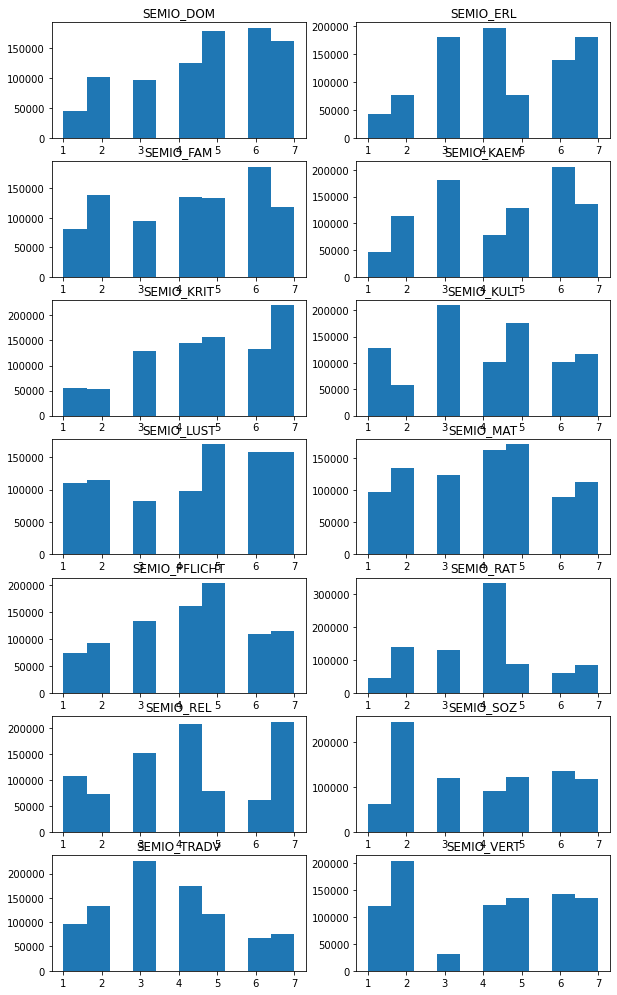

In [75]:
histogram_plot('col_SEMIO')

In [76]:
customers_final[col_group_dict['col_SEMIO']].isnull().sum()

SEMIO_DOM        0
SEMIO_ERL        0
SEMIO_FAM        0
SEMIO_KAEM       0
SEMIO_KRIT       0
SEMIO_KULT       0
SEMIO_LUST       0
SEMIO_MAT        0
SEMIO_PFLICHT    0
SEMIO_RAT        0
SEMIO_REL        0
SEMIO_SOZ        0
SEMIO_TRADV      0
SEMIO_VERT       0
dtype: int64

### CJT Columns

In [77]:
azdias[col_group_dict['col_CJT']].isnull().sum()

CJT_GESAMTTYP        4854
CJT_KATALOGNUTZER    4854
CJT_TYP_1            4854
CJT_TYP_2            4854
CJT_TYP_3            4854
CJT_TYP_4            4854
CJT_TYP_5            4854
CJT_TYP_6            4854
dtype: int64

In [78]:
azdias[col_group_dict['col_CJT']]

,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6
0,2.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0
1,5.0,1.0,5.0,5.0,2.0,3.0,1.0,1.0
2,3.0,2.0,4.0,4.0,1.0,3.0,2.0,2.0
3,2.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
4,5.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...
891216,5.0,2.0,5.0,4.0,3.0,3.0,1.0,2.0
891217,4.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0
891218,4.0,1.0,5.0,4.0,3.0,1.0,1.0,2.0
891219,3.0,3.0,5.0,5.0,1.0,2.0,2.0,4.0


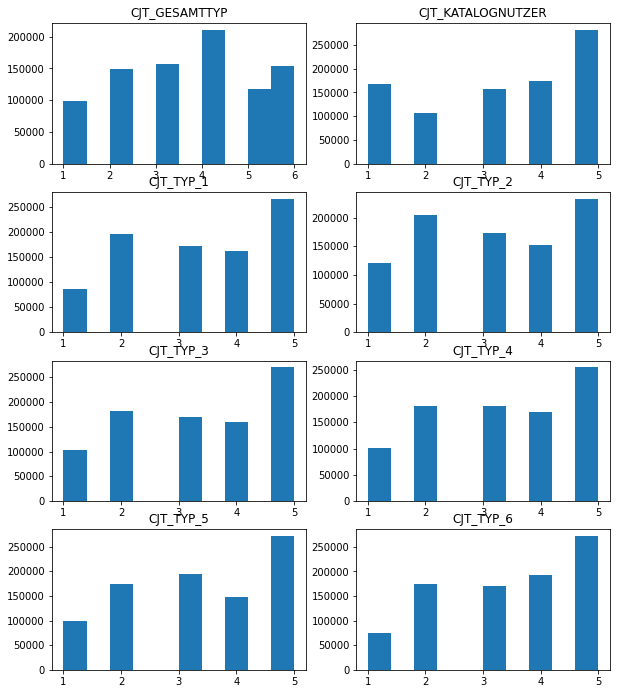

In [79]:
histogram_plot('col_CJT')

From histograms of all CJT columns, we can see that there is no value 0 in all of them. therefore we can replace the missing values with 0 which represents 'unknown'.

In [80]:
impute_missing_values(col_group_dict['col_CJT'],0)

In [81]:
azdias[col_group_dict['col_CJT']].isnull().sum()

CJT_GESAMTTYP        0
CJT_KATALOGNUTZER    0
CJT_TYP_1            0
CJT_TYP_2            0
CJT_TYP_3            0
CJT_TYP_4            0
CJT_TYP_5            0
CJT_TYP_6            0
dtype: int64

In [82]:
customers_final[col_group_dict['col_CJT']].isnull().sum()

CJT_GESAMTTYP        0
CJT_KATALOGNUTZER    0
CJT_TYP_1            0
CJT_TYP_2            0
CJT_TYP_3            0
CJT_TYP_4            0
CJT_TYP_5            0
CJT_TYP_6            0
dtype: int64

### PLZ8 Columns

In [83]:
azdias[col_group_dict['col_PLZ8']].isnull().sum()

PLZ8_ANTG1     116515
PLZ8_ANTG2     116515
PLZ8_ANTG3     116515
PLZ8_ANTG4     116515
PLZ8_BAUMAX    116515
PLZ8_GBZ       116515
PLZ8_HHZ       116515
dtype: int64

In [84]:
(azdias[col_group_dict['col_PLZ8']].isnull().sum(axis=1) == 7).sum()

116515

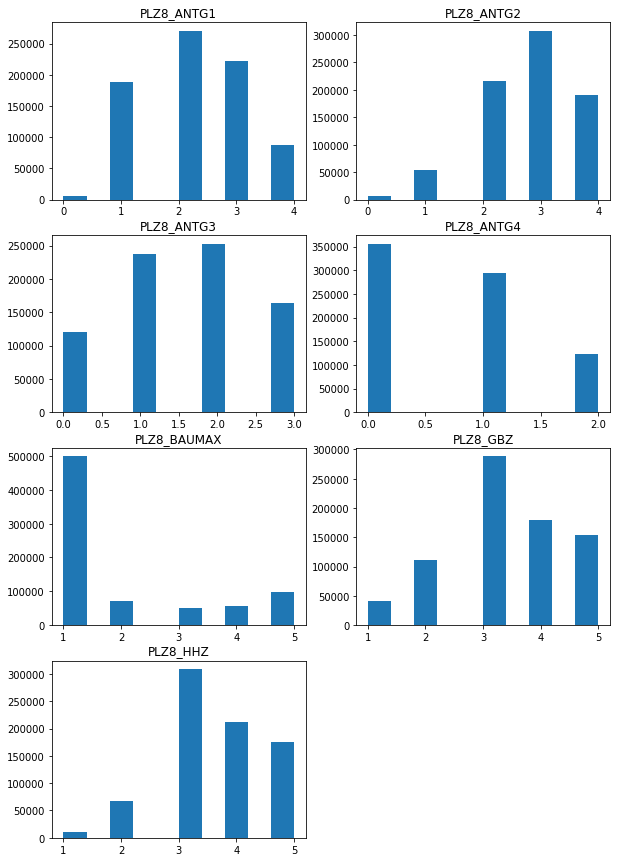

In [85]:
histogram_plot('col_PLZ8')

From the histograms of the features, we can see that all columns do not have unknown attribute. and for PLZ8_BAUMAX has no attribute for unknown value in the DIAS attributes value sheets. So, we can fill the missing values in all PLZ8 columns with -1 except PLZ_BAUMAX, we will fill NaN values with the mode (1).

In [86]:
impute_missing_values('PLZ8_BAUMAX',1)

In [87]:
impute_missing_values(col_group_dict['col_PLZ8'],-1)

In [88]:
azdias[col_group_dict['col_PLZ8']].isnull().sum()

PLZ8_ANTG1     0
PLZ8_ANTG2     0
PLZ8_ANTG3     0
PLZ8_ANTG4     0
PLZ8_BAUMAX    0
PLZ8_GBZ       0
PLZ8_HHZ       0
dtype: int64

In [89]:
customers_final[col_group_dict['col_PLZ8']].isnull().sum()

PLZ8_ANTG1     0
PLZ8_ANTG2     0
PLZ8_ANTG3     0
PLZ8_ANTG4     0
PLZ8_BAUMAX    0
PLZ8_GBZ       0
PLZ8_HHZ       0
dtype: int64

### LP Columns

In [90]:
azdias[col_group_dict['col_LP']].isnull().sum()

LP_FAMILIE_FEIN        4854
LP_FAMILIE_GROB        4854
LP_LEBENSPHASE_FEIN    4854
LP_LEBENSPHASE_GROB    4854
LP_STATUS_FEIN         4854
LP_STATUS_GROB         4854
dtype: int64

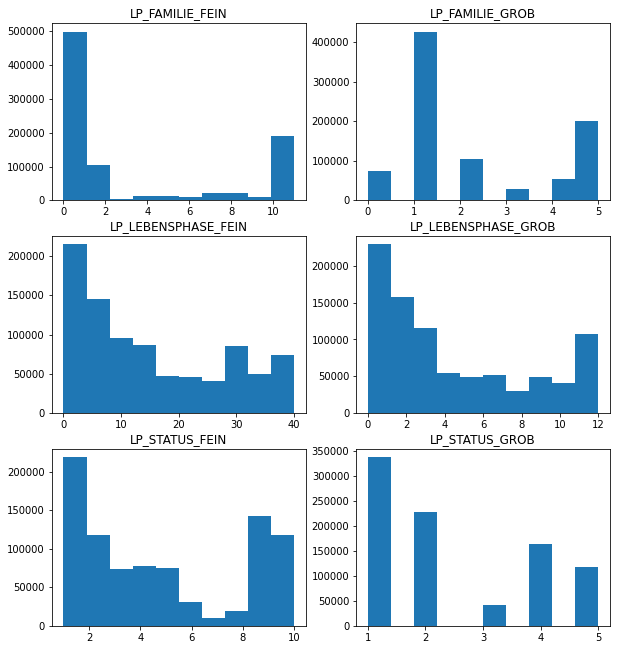

In [91]:
histogram_plot('col_LP')

We see that the values in the following columns LP_FAMILIE_FEIN,LP_FAMILIE_GROB, LP_LEBENSPHASE_FEIN,LP_FAMILIE_GROB are shifted from the references in DIAS value attributes sheet. Therefore, we can shift the values by 1 to match the references used in the sheet. and will fill missing values with the mode.

In [92]:
for col in ['LP_FAMILIE_FEIN','LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB']:
    fillna_mode(col)
    azdias[col] = azdias[col].apply(lambda x:x+1)
    customers_final[col] = customers_final[col].apply(lambda x:x+1)

For LP_STATUS_GROB and LP_STATUS_FEIN, they are within range in attribute sheet. so, we will fill the missing the values with the mode without shifting.

In [93]:
azdias['LP_STATUS_FEIN'].value_counts(ascending=False).index[0],azdias['LP_STATUS_GROB'].value_counts(ascending=False).index[0]

(1.0, 1.0)

In [94]:
impute_missing_values(['LP_STATUS_FEIN','LP_STATUS_GROB'],1)

In [95]:
azdias[col_group_dict['col_LP']].isnull().sum()

LP_FAMILIE_FEIN        0
LP_FAMILIE_GROB        0
LP_LEBENSPHASE_FEIN    0
LP_LEBENSPHASE_GROB    0
LP_STATUS_FEIN         0
LP_STATUS_GROB         0
dtype: int64

In [96]:
customers_final[col_group_dict['col_LP']].isnull().sum()

LP_FAMILIE_FEIN        0
LP_FAMILIE_GROB        0
LP_LEBENSPHASE_FEIN    0
LP_LEBENSPHASE_GROB    0
LP_STATUS_FEIN         0
LP_STATUS_GROB         0
dtype: int64

### FINANZ Columns

In [97]:
azdias[col_group_dict['col_FINANZ']].isnull().sum()

FINANZ_ANLEGER           0
FINANZ_HAUSBAUER         0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_UNAUFFAELLIGER    0
FINANZ_VORSORGER         0
dtype: int64

In [98]:
customers_final[col_group_dict['col_FINANZ']].isnull().sum()

FINANZ_ANLEGER           0
FINANZ_HAUSBAUER         0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_UNAUFFAELLIGER    0
FINANZ_VORSORGER         0
dtype: int64

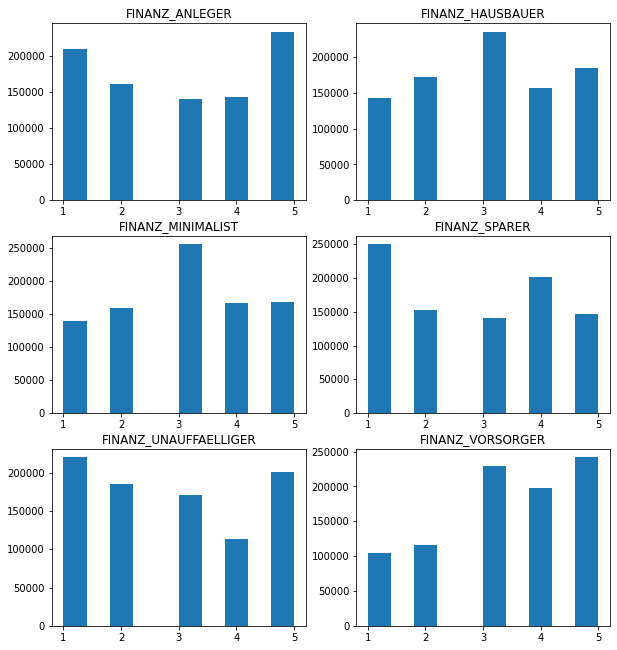

In [99]:
histogram_plot('col_FINANZ')

In [100]:
customers_final[col_group_dict['col_FINANZ']].isnull().sum()

FINANZ_ANLEGER           0
FINANZ_HAUSBAUER         0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_UNAUFFAELLIGER    0
FINANZ_VORSORGER         0
dtype: int64

### ANZ Columns

In [101]:
azdias[col_group_dict['col_ANZ']].isnull().sum()

ANZ_HAUSHALTE_AKTIV           93148
ANZ_HH_TITEL                  97008
ANZ_KINDER                    73499
ANZ_PERSONEN                  73499
ANZ_STATISTISCHE_HAUSHALTE    93148
ANZ_TITEL                     73499
dtype: int64

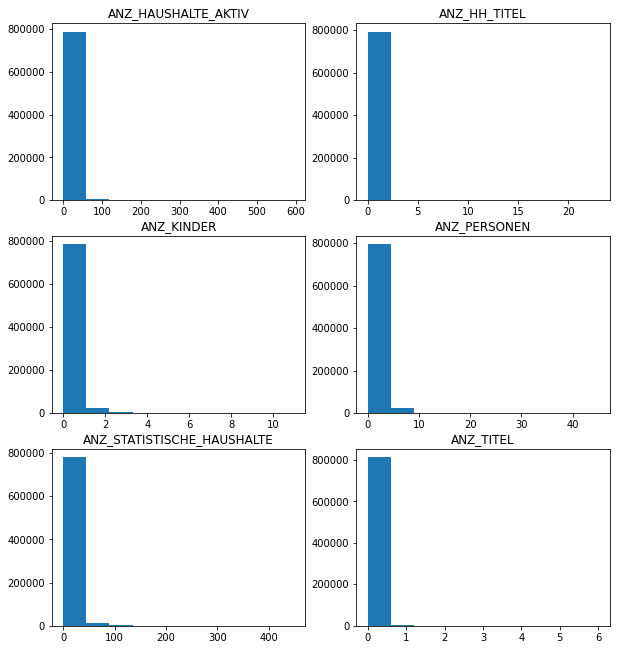

In [102]:
histogram_plot('col_ANZ')

In [103]:
fillna_mode(col_group_dict['col_ANZ'])

In [104]:
azdias[col_group_dict['col_ANZ']].isnull().sum()

ANZ_HAUSHALTE_AKTIV           0
ANZ_HH_TITEL                  0
ANZ_KINDER                    0
ANZ_PERSONEN                  0
ANZ_STATISTISCHE_HAUSHALTE    0
ANZ_TITEL                     0
dtype: int64

In [105]:
customers_final[col_group_dict['col_ANZ']].isnull().sum()

ANZ_HAUSHALTE_AKTIV           0
ANZ_HH_TITEL                  0
ANZ_KINDER                    0
ANZ_PERSONEN                  0
ANZ_STATISTISCHE_HAUSHALTE    0
ANZ_TITEL                     0
dtype: int64

ANZ columns has no missing values, so we will fill the missing values by the mode.

### ALTER Columns

In [106]:
azdias[col_group_dict['col_ALTER']].isnull().sum()

ALTER_HH        73499
ALTER_KIND1    810163
ALTER_KIND2    861722
ALTER_KIND3    885051
ALTER_KIND4    890016
dtype: int64

In [107]:
(azdias[azdias['ALTER_HH'].isnull()][col_group_dict['col_ALTER']].isnull().sum(axis=1)==5).sum()

73499

We see that when ALTER_HH column has a missing value, the remaining all ALTER columns have missing values have missing values too.

Also, ALTER_KIND columns refer to the age of the childern and hence it has large amount of NaN values. For ALTER_HH, we can fill NaN values with 0 as 'unkown'. For ALTER_KIND columns, we cannot drop the columns as they have information we might lose, so we can replace the missing values with 0 as in case of there is no child, his/her age is 0.

In [108]:
impute_missing_values(col_group_dict['col_ALTER'],0)

In [109]:
azdias[col_group_dict['col_ALTER']].isnull().sum()

ALTER_HH       0
ALTER_KIND1    0
ALTER_KIND2    0
ALTER_KIND3    0
ALTER_KIND4    0
dtype: int64

### VK Columns

In [110]:
azdias[col_group_dict['col_VK']].isnull().sum()

VK_DHT4A      75917
VK_DISTANZ    75917
VK_ZG11       75917
dtype: int64

In [111]:
azdias[col_group_dict['col_VK']]

,VK_DHT4A,VK_DISTANZ,VK_ZG11
0,NaN,NaN,NaN
1,8.0,11.0,10.0
2,9.0,9.0,6.0
3,7.0,10.0,11.0
4,3.0,5.0,4.0
...,...,...,...
891216,4.0,7.0,8.0
891217,6.0,9.0,6.0
891218,7.0,10.0,8.0
891219,9.0,8.0,5.0


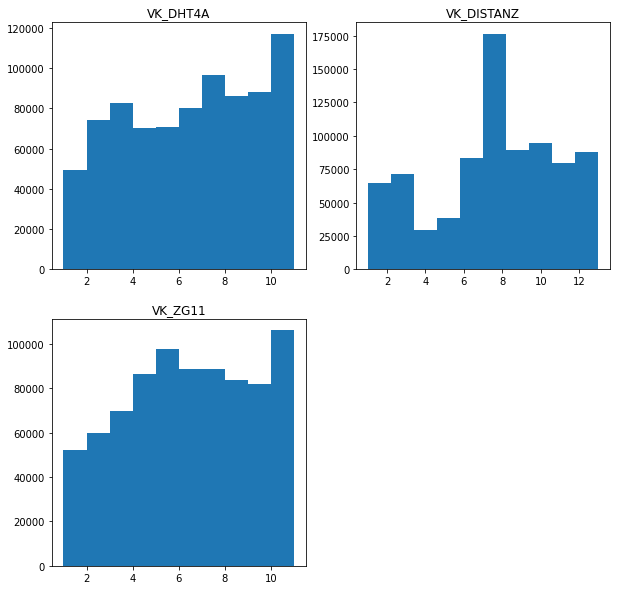

In [112]:
histogram_plot('col_VK')

In [113]:
azdias['VK_ZG11'].unique(),azdias['VK_DISTANZ'].unique(),azdias['VK_DHT4A'].unique()

(array([nan, 10.,  6., 11.,  4.,  9.,  8.,  1.,  3.,  7.,  5.,  2.]),
 array([nan, 11.,  9., 10.,  5.,  7., 12.,  1.,  6., 13.,  8.,  4.,  3.,
         2.]),
 array([nan,  8.,  9.,  7.,  3., 10.,  1.,  6.,  4.,  2.,  5., 11.]))

There is not any details about these columns in the sheets. from unique values, the columns are categorical features.

In [114]:
fillna_mode(col_group_dict['col_VK'])

### RT Columns

In [115]:
azdias[col_group_dict['col_RT']].isnull().mean()

RT_KEIN_ANREIZ     0.005446
RT_SCHNAEPPCHEN    0.005446
RT_UEBERGROESSE    0.057478
dtype: float64

In [116]:
azdias[col_group_dict['col_RT']]

,RT_KEIN_ANREIZ,RT_SCHNAEPPCHEN,RT_UEBERGROESSE
0,1.0,4.0,1.0
1,5.0,3.0,5.0
2,5.0,4.0,5.0
3,3.0,2.0,3.0
4,3.0,5.0,5.0
...,...,...,...
891216,4.0,5.0,5.0
891217,5.0,3.0,3.0
891218,4.0,5.0,5.0
891219,5.0,5.0,3.0


There is no details about these columns in the sheets. Also, the percentage of missing values is low and can be dropped.

In [117]:
azdias.dropna(subset=col_group_dict['col_RT'],how='any',inplace=True)

In [118]:
azdias.shape

(839995, 366)

In [119]:
customers_final.dropna(subset=col_group_dict['col_RT'],how='any',inplace=True)

In [120]:
azdias[col_group_dict['col_RT']].isnull().sum()

RT_KEIN_ANREIZ     0
RT_SCHNAEPPCHEN    0
RT_UEBERGROESSE    0
dtype: int64

In [121]:
customers_final[col_group_dict['col_RT']].isnull().sum()

RT_KEIN_ANREIZ     0
RT_SCHNAEPPCHEN    0
RT_UEBERGROESSE    0
dtype: int64

### Gebäude Columns

In [122]:
azdias[col_group_dict['col_GEBAEUDETYP']].isnull().sum()

GEBAEUDETYP           47450
GEBAEUDETYP_RASTER    47457
dtype: int64

In [123]:
azdias[col_group_dict['col_GEBAEUDETYP']]

,GEBAEUDETYP,GEBAEUDETYP_RASTER
0,NaN,NaN
1,8.0,3.0
2,1.0,4.0
3,1.0,4.0
4,1.0,5.0
...,...,...
891216,8.0,4.0
891217,8.0,3.0
891218,8.0,4.0
891219,8.0,4.0


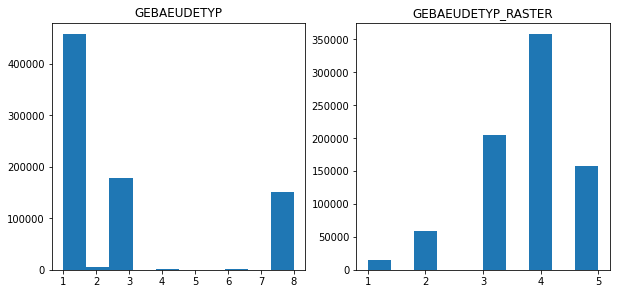

In [124]:
histogram_plot('col_GEBAEUDETYP')

In [125]:
impute_missing_values('GEBAEUDETYP',0)

In [126]:
fillna_mode('GEBAEUDETYP_RASTER')

In [127]:
missing_values_dict

{'KBA13_ALTERHALTER_30': -1,
 'KBA13_ALTERHALTER_45': -1,
 'KBA13_ALTERHALTER_60': -1,
 'KBA13_ALTERHALTER_61': -1,
 'KBA13_ANTG1': -1,
 'KBA13_ANTG2': -1,
 'KBA13_ANTG3': -1,
 'KBA13_ANTG4': -1,
 'KBA13_ANZAHL_PKW': -1,
 'KBA13_AUDI': -1,
 'KBA13_AUTOQUOTE': -1,
 'KBA13_BAUMAX': -1,
 'KBA13_BJ_1999': -1,
 'KBA13_BJ_2000': -1,
 'KBA13_BJ_2004': -1,
 'KBA13_BJ_2006': -1,
 'KBA13_BJ_2008': -1,
 'KBA13_BJ_2009': -1,
 'KBA13_BMW': -1,
 'KBA13_CCM_0_1400': -1,
 'KBA13_CCM_1000': -1,
 'KBA13_CCM_1200': -1,
 'KBA13_CCM_1400': -1,
 'KBA13_CCM_1401_2500': -1,
 'KBA13_CCM_1500': -1,
 'KBA13_CCM_1600': -1,
 'KBA13_CCM_1800': -1,
 'KBA13_CCM_2000': -1,
 'KBA13_CCM_2500': -1,
 'KBA13_CCM_2501': -1,
 'KBA13_CCM_3000': -1,
 'KBA13_CCM_3001': -1,
 'KBA13_FAB_ASIEN': -1,
 'KBA13_FAB_SONSTIGE': -1,
 'KBA13_FIAT': -1,
 'KBA13_FORD': -1,
 'KBA13_GBZ': -1,
 'KBA13_HALTER_20': -1,
 'KBA13_HALTER_25': -1,
 'KBA13_HALTER_30': -1,
 'KBA13_HALTER_35': -1,
 'KBA13_HALTER_40': -1,
 'KBA13_HALTER_45': -1,
 'KBA13_

In GEBAEUDETYP column, missing values will be filled by unkown value (0). For 'GEBAEUDETYP_RASTER', we will use the mode to fill NaN values.

### ALTERSKATEGORIE columns

In [128]:
azdias[col_group_dict['col_ALTERSKATEGORIE']].isnull().sum()

ALTERSKATEGORIE_FEIN    216524
ALTERSKATEGORIE_GROB         0
dtype: int64

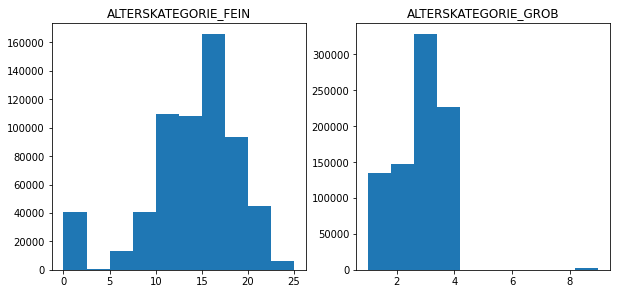

In [129]:
histogram_plot('col_ALTERSKATEGORIE')

In ALTERSKATEGORIE_FEIN has high percentage of missing values and the information are already included in ALTERSKATEGORIE_GROB, so we can drop the column.

In [130]:
azdias.drop(columns='ALTERSKATEGORIE_FEIN',inplace=True)

In [131]:
customers_final.drop(columns='ALTERSKATEGORIE_FEIN',inplace=True)

### MOBI Columns

In [132]:
azdias[col_group_dict['col_MOBI']].isnull().sum()

MOBI_RASTER    47450
MOBI_REGIO     87277
dtype: int64

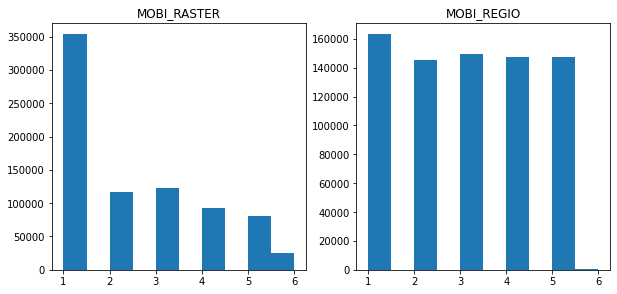

In [133]:
histogram_plot('col_MOBI')

In [134]:
fillna_mode(col_group_dict['col_MOBI'])

In [135]:
azdias[col_group_dict['col_MOBI']].isnull().sum()

MOBI_RASTER    0
MOBI_REGIO     0
dtype: int64

In [136]:
customers_final[col_group_dict['col_MOBI']].isnull().sum()

MOBI_RASTER    0
MOBI_REGIO     0
dtype: int64

### EXTSEL992 Column

In [137]:
azdias['EXTSEL992'].isnull().sum()

604790

<AxesSubplot:>

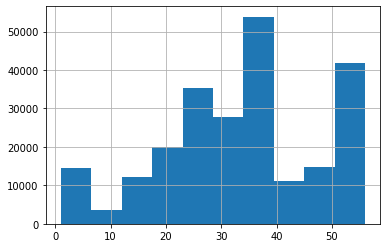

In [138]:
azdias['EXTSEL992'].hist()

'EXTSEL992' column has no information in the sheets and has high percentage of missing values. so, we can drop it.

In [139]:
azdias.drop(columns='EXTSEL992',inplace=True)

In [140]:
customers_final.drop(columns='EXTSEL992',inplace=True)

### KK_KUNDENTYP Column

In [141]:
azdias['KK_KUNDENTYP'].isnull().sum()

535726

In [142]:
azdias['KK_KUNDENTYP'].value_counts()

3.0    64642
2.0    62095
5.0    47663
4.0    44186
6.0    43740
1.0    41943
Name: KK_KUNDENTYP, dtype: int64

In [143]:
impute_missing_values('KK_KUNDENTYP',-1)

<AxesSubplot:>

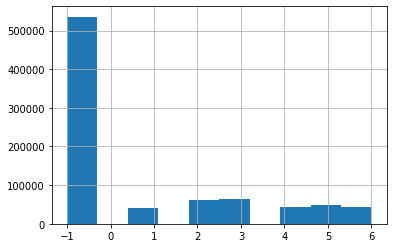

In [144]:
azdias['KK_KUNDENTYP'].hist()

### String-type Features

In [145]:
cat_features = azdias.dtypes[azdias.dtypes == 'O'].index
cat_features

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

In [146]:
azdias[cat_features].isnull().sum()

CAMEO_DEU_2015              53248
CAMEO_DEUG_2015             53248
CAMEO_INTL_2015             53248
D19_LETZTER_KAUF_BRANCHE        0
EINGEFUEGT_AM               47450
OST_WEST_KZ                 47450
dtype: int64

<BarContainer object of 45 artists>

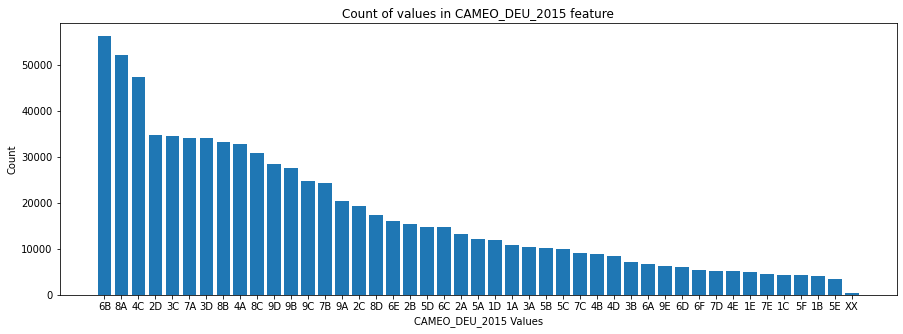

In [147]:
x= azdias['CAMEO_DEU_2015'].value_counts()
plt.figure(figsize=(15,5))
plt.title("Count of values in CAMEO_DEU_2015 feature")
plt.xlabel("CAMEO_DEU_2015 Values")
plt.ylabel("Count")
plt.bar(x.index, height= x.values)

<BarContainer object of 10 artists>

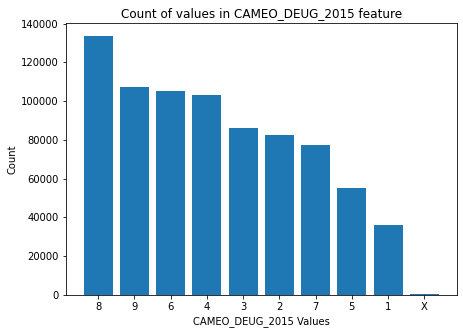

In [148]:
x= azdias['CAMEO_DEUG_2015'].value_counts()
plt.figure(figsize=(7,5))
plt.title("Count of values in CAMEO_DEUG_2015 feature")
plt.xlabel("CAMEO_DEUG_2015 Values")
plt.ylabel("Count")
plt.bar(x.index, height= x.values)

<BarContainer object of 22 artists>

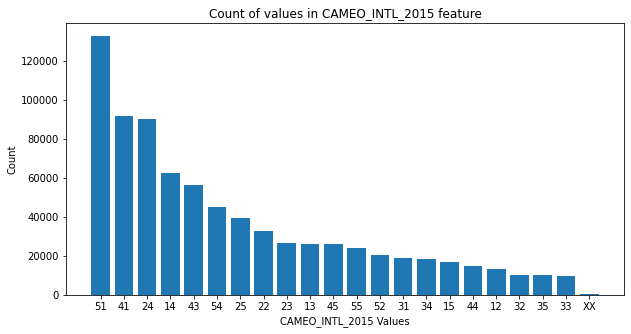

In [149]:
x= azdias['CAMEO_INTL_2015'].value_counts()
plt.figure(figsize=(10,5))
plt.title("Count of values in CAMEO_INTL_2015 feature")
plt.xlabel("CAMEO_INTL_2015 Values")
plt.ylabel("Count")
plt.bar(x.index, height= x.values)

In [150]:
impute_missing_values('CAMEO_DEUG_2015','-1')

In [151]:
azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].apply(lambda x:np.where(x=='X','-1',x))

In [152]:
customers_final['CAMEO_DEUG_2015'] = customers_final['CAMEO_DEUG_2015'].apply(lambda x:np.where(x=='X','-1',x))

In [153]:
impute_missing_values('CAMEO_INTL_2015',-1)

In [154]:
azdias['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].apply(lambda x:np.where(x=='XX','-1',x))

In [155]:
customers_final['CAMEO_INTL_2015'] = customers_final['CAMEO_INTL_2015'].apply(lambda x:np.where(x=='XX','-1',x))

In [156]:
impute_missing_values('CAMEO_DEU_2015',-1)

In [157]:
azdias['CAMEO_DEU_2015'] = azdias['CAMEO_DEU_2015'].apply(lambda x:np.where(x=='XX','-1',x))

In [158]:
customers_final['CAMEO_DEU_2015'] = customers_final['CAMEO_DEU_2015'].apply(lambda x:np.where(x=='XX','-1',x))

Missing values replaced by -1 and XX, X values replaced by -1 too.

In [159]:
cat_features

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

For 'EINGEFUEGT_AM' column represents the date the user added. the missing values can be replaced with bfill function. then we can get the diferrence in time with today date.

In [160]:
azdias['EINGEFUEGT_AM'] = pd.to_datetime(azdias['EINGEFUEGT_AM']).bfill()

In [161]:
azdias['EINGEFUEGT_AM'] = (pd.to_datetime('2021-09-25') - azdias['EINGEFUEGT_AM']).astype('timedelta64[h]')/24

In [162]:
azdias['EINGEFUEGT_AM']

0         10820.0
1         10820.0
2         10818.0
3          8923.0
4         10818.0
           ...   
891216    10820.0
891217    10820.0
891218    10820.0
891219    10818.0
891220    10820.0
Name: EINGEFUEGT_AM, Length: 839995, dtype: float64

In [163]:
customers_final['EINGEFUEGT_AM'] = pd.to_datetime(customers_final['EINGEFUEGT_AM']).bfill()

In [164]:
customers_final['EINGEFUEGT_AM'] = (pd.to_datetime('2021-09-25') - customers_final['EINGEFUEGT_AM']).astype('timedelta64[h]')/24

For 'OST_WEST_KZ' column we can replace missing values with 'unknown' attribute (-1)

In [165]:
azdias['OST_WEST_KZ'].isnull().sum()

47450

In [166]:
impute_missing_values('OST_WEST_KZ',-1)

In [167]:
azdias[cat_features]

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,-1,-1,-1,D19_UNBEKANNT,10820.0,-1
1,8A,8,51,D19_UNBEKANNT,10820.0,W
2,4C,4,24,D19_UNBEKANNT,10818.0,W
3,2A,2,12,D19_UNBEKANNT,8923.0,W
4,6B,6,43,D19_SCHUHE,10818.0,W
...,...,...,...,...,...,...
891216,7A,7,41,D19_HAUS_DEKO,10820.0,W
891217,9D,9,51,D19_UNBEKANNT,10820.0,W
891218,4C,4,24,D19_BEKLEIDUNG_GEH,10820.0,W
891219,9D,9,51,D19_UNBEKANNT,10818.0,W


In [168]:
azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].astype(int)

In [169]:
azdias['CAMEO_DEU_2015'].unique()

array(['-1', '8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D',
       '5C', '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C',
       '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D',
       '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F',
       '1C'], dtype=object)

In [170]:
cat_features_mapping('OST_WEST_KZ')

{-1: 1, 'W': 2, 'O': 3}


In [171]:
cat_features_mapping('CAMEO_DEU_2015')

{'-1': -1, '8A': 2, '4C': 3, '2A': 4, '6B': 5, '8C': 6, '4A': 7, '2D': 8, '1A': 9, '1E': 10, '9D': 11, '5C': 12, '8B': 13, '7A': 14, '5D': 15, '9E': 16, '9B': 17, '1B': 18, '3D': 19, '4E': 20, '4B': 21, '3C': 22, '5A': 23, '7B': 24, '9A': 25, '6D': 26, '6E': 27, '2C': 28, '7C': 29, '9C': 30, '7D': 31, '5E': 32, '1D': 33, '8D': 34, '6C': 35, '6A': 36, '5B': 37, '4D': 38, '3A': 39, '2B': 40, '7E': 41, '3B': 42, '6F': 43, '5F': 44, '1C': 45}


In [172]:
azdias['CAMEO_DEU_2015'].unique()

array([-1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [173]:
cat_features_mapping('D19_LETZTER_KAUF_BRANCHE')

{'D19_UNBEKANNT': 1, 'D19_SCHUHE': 2, 'D19_ENERGIE': 3, 'D19_KOSMETIK': 4, 'D19_VOLLSORTIMENT': 5, 'D19_SONSTIGE': 6, 'D19_BANKEN_GROSS': 7, 'D19_DROGERIEARTIKEL': 8, 'D19_HANDWERK': 9, 'D19_BUCH_CD': 10, 'D19_VERSICHERUNGEN': 11, 'D19_VERSAND_REST': 12, 'D19_TELKO_REST': 13, 'D19_BANKEN_DIREKT': 14, 'D19_BANKEN_REST': 15, 'D19_FREIZEIT': 16, 'D19_LEBENSMITTEL': 17, 'D19_HAUS_DEKO': 18, 'D19_BEKLEIDUNG_REST': 19, 'D19_SAMMELARTIKEL': 20, 'D19_TELKO_MOBILE': 21, 'D19_REISEN': 22, 'D19_BEKLEIDUNG_GEH': 23, 'D19_TECHNIK': 24, 'D19_NAHRUNGSERGAENZUNG': 25, 'D19_DIGIT_SERV': 26, 'D19_LOTTO': 27, 'D19_RATGEBER': 28, 'D19_TIERARTIKEL': 29, 'D19_KINDERARTIKEL': 30, 'D19_BIO_OEKO': 31, 'D19_WEIN_FEINKOST': 32, 'D19_GARTEN': 33, 'D19_BILDUNG': 34, 'D19_BANKEN_LOKAL': 35}


In [174]:
azdias['D19_LETZTER_KAUF_BRANCHE'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35], dtype=int64)

In [175]:
azdias.dtypes[azdias.dtypes == 'O'].index

Index([], dtype='object')

In [176]:
customers_final.dtypes[azdias.dtypes == 'O'].index

Index([], dtype='object')

### REGIOTYP Column

In [177]:
azdias['REGIOTYP'].isnull().sum()

75248

In [178]:
azdias['REGIOTYP'].value_counts()

6.0    194009
5.0    144399
3.0     93240
2.0     91013
7.0     83372
4.0     67724
1.0     54375
0.0     36615
Name: REGIOTYP, dtype: int64

In [179]:
impute_missing_values('REGIOTYP',0)

### KKK Column

In [180]:
azdias['KKK'].isnull().sum()

75248

In [181]:
azdias['KKK'].value_counts()

3.0    271259
2.0    180190
4.0    177458
1.0     99225
0.0     36615
Name: KKK, dtype: int64

In [182]:
impute_missing_values('KKK',0)

### HH Column

In [183]:
azdias[col_group_dict['col_HH']].isnull().sum()

HH_DELTA_FLAG         61448
HH_EINKOMMEN_SCORE    18248
dtype: int64

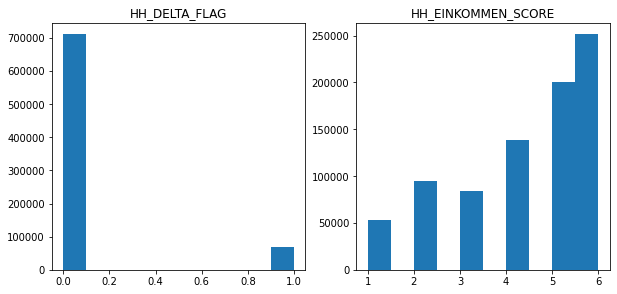

In [184]:
histogram_plot('col_HH')

In [185]:
impute_missing_values('HH_EINKOMMEN_SCORE',0)

In [186]:
impute_missing_values('HH_DELTA_FLAG',0)

### UMFELD Column

In [187]:
azdias[col_group_dict['col_UMFELD']].isnull().sum()

UMFELD_ALT     52035
UMFELD_JUNG    52035
dtype: int64

In [188]:
(azdias[col_group_dict['col_UMFELD']].isnull().sum(axis=1)==2).sum()

52035

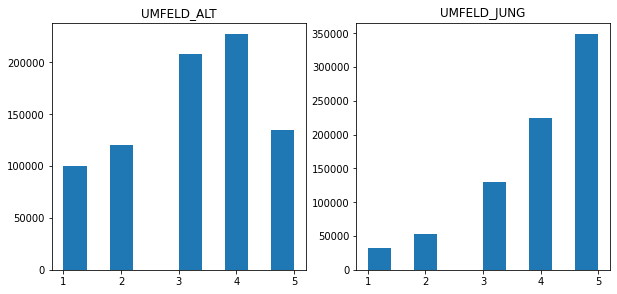

In [189]:
histogram_plot('col_UMFELD')

In [190]:
fillna_mode(col_group_dict['col_UMFELD'])

In [191]:
azdias[col_group_dict['col_UMFELD']].isnull().sum()

UMFELD_ALT     0
UMFELD_JUNG    0
dtype: int64

### W_KEIT_KIND_HH Column

Text(0, 0.5, 'Count')

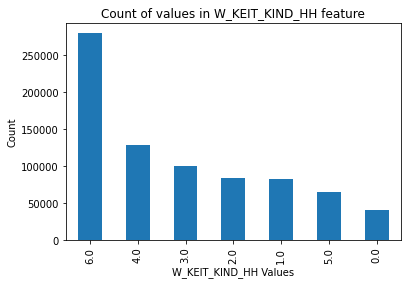

In [192]:
azdias['W_KEIT_KIND_HH'].value_counts().plot(kind='bar')
plt.title("Count of values in W_KEIT_KIND_HH feature")
plt.xlabel("W_KEIT_KIND_HH Values")
plt.ylabel("Count")

In [193]:
impute_missing_values('W_KEIT_KIND_HH',0)

### VERDICHTUNGSRAUM Column

In [194]:
azdias['VERDICHTUNGSRAUM'].isnull().sum()

51547

Text(0, 0.5, 'Count')

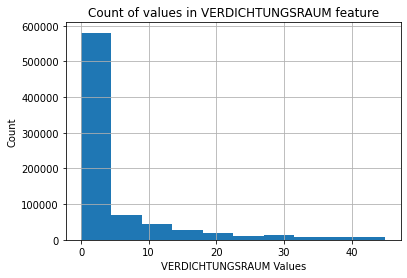

In [195]:
azdias['VERDICHTUNGSRAUM'].hist()
plt.title("Count of values in VERDICHTUNGSRAUM feature")
plt.xlabel("VERDICHTUNGSRAUM Values")
plt.ylabel("Count")

In [196]:
fillna_mode('VERDICHTUNGSRAUM')

### RELAT_AB Column

In [197]:
azdias['RELAT_AB'].isnull().sum()

51489

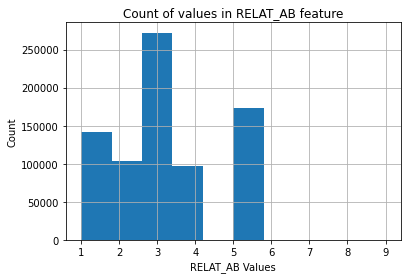

In [198]:
plt.title("Count of values in RELAT_AB feature")
plt.xlabel("RELAT_AB Values")
plt.ylabel("Count")
azdias['RELAT_AB'].hist();

In [199]:
azdias['RELAT_AB'].value_counts()

3.0    272174
5.0    173803
1.0    141865
2.0    104036
4.0     96469
9.0       159
Name: RELAT_AB, dtype: int64

In [200]:
impute_missing_values('RELAT_AB',9)

### ARBEIT Column

In [201]:
azdias['ARBEIT'].isnull().sum()

51489

In [202]:
azdias['ARBEIT'].value_counts()

4.0    309239
3.0    253129
2.0    134708
1.0     56371
5.0     34900
9.0       159
Name: ARBEIT, dtype: int64

ARBEIT has no enough information in sheets but it has the same concept as RELAT_AB column and the same value counts, so we can fill NaN values with 9 as we did in RELAT_AB.

In [203]:
impute_missing_values('ARBEIT',9)

### ORTSGR_KLS9 Column

In [204]:
azdias['ORTSGR_KLS9'].isnull().sum()

51489

<AxesSubplot:title={'center':'Count of values in ORTSGR_KLS9 feature'}, xlabel='ORTSGR_KLS9 Values', ylabel='Count'>

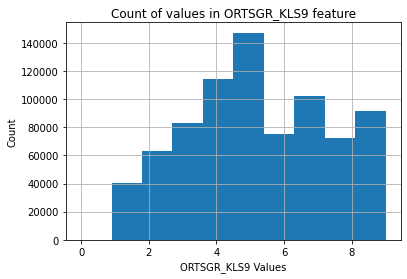

In [205]:
plt.title("Count of values in ORTSGR_KLS9 feature")
plt.xlabel("ORTSGR_KLS9 Values")
plt.ylabel("Count")
azdias['ORTSGR_KLS9'].hist()

In [206]:
azdias['ORTSGR_KLS9'].dtypes

dtype('float64')

In [207]:
impute_missing_values('ORTSGR_KLS9',-1)

### INNENSTADT Column

In [208]:
azdias['INNENSTADT'].isnull().sum()

48039

<AxesSubplot:title={'center':'Count of values in INNENSTADT feature'}, xlabel='INNENSTADT Values', ylabel='Count'>

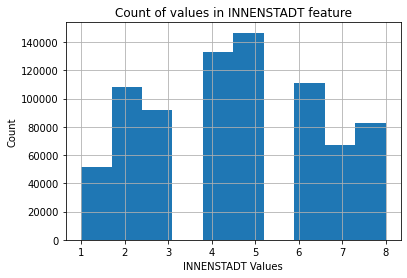

In [209]:
plt.title("Count of values in INNENSTADT feature")
plt.xlabel("INNENSTADT Values")
plt.ylabel("Count")
azdias['INNENSTADT'].hist()

In [210]:
impute_missing_values('INNENSTADT',-1)

### BALLRAUM Column

In [211]:
azdias['BALLRAUM'].isnull().sum()

48039

In [212]:
azdias['BALLRAUM'].value_counts()

6.0    253392
1.0    150690
2.0    103764
7.0     98453
3.0     72722
4.0     60925
5.0     52010
Name: BALLRAUM, dtype: int64

In [213]:
azdias['BALLRAUM'].dtypes

dtype('float64')

In [214]:
impute_missing_values('BALLRAUM',-1)

### EWDICHTE Column

In [215]:
azdias['EWDICHTE'].isnull().sum()

48039

In [216]:
azdias['EWDICHTE'].value_counts()

6.0    199590
5.0    160064
2.0    138123
4.0    129820
1.0     83529
3.0     80830
Name: EWDICHTE, dtype: int64

In [217]:
impute_missing_values('EWDICHTE',-1)

### FIRMENDICHTE Column

In [218]:
azdias['FIRMENDICHTE'].isnull().sum()

47457

In [219]:
azdias['FIRMENDICHTE'].value_counts()

4.0    271748
3.0    180393
5.0    158114
2.0    138085
1.0     44198
Name: FIRMENDICHTE, dtype: int64

In [220]:
fillna_mode('FIRMENDICHTE')

### GEbÄUDEJAHR Column

In [221]:
azdias['MIN_GEBAEUDEJAHR'].isnull().sum()

47450

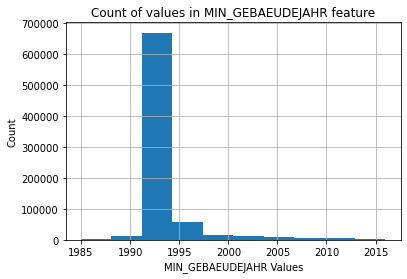

In [222]:
plt.title("Count of values in MIN_GEBAEUDEJAHR feature")
plt.xlabel("MIN_GEBAEUDEJAHR Values")
plt.ylabel("Count")
azdias['MIN_GEBAEUDEJAHR'].hist();

In [223]:
azdias['MIN_GEBAEUDEJAHR'].mode()[0]

1992.0

In [224]:
fillna_mode('MIN_GEBAEUDEJAHR')

### WOHNLAGE Column

In [225]:
azdias['WOHNLAGE'].isnull().sum()

47450

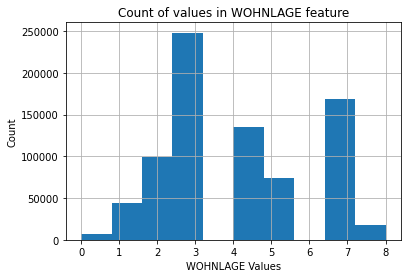

In [226]:
plt.title("Count of values in WOHNLAGE feature")
plt.xlabel("WOHNLAGE Values")
plt.ylabel("Count")
azdias['WOHNLAGE'].hist();

In [227]:
azdias['WOHNLAGE'].dtypes

dtype('float64')

In [228]:
impute_missing_values('WOHNLAGE',-1)

### DSL_FLAG Column

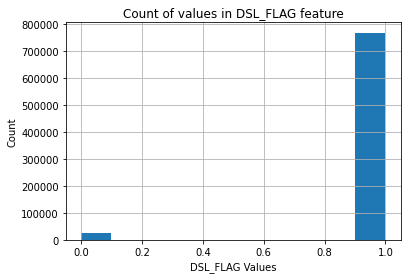

In [229]:
plt.title("Count of values in DSL_FLAG feature")
plt.xlabel("DSL_FLAG Values")
plt.ylabel("Count")
azdias['DSL_FLAG'].hist();

There is not engough information about DSL FLAG in sheets, but it is similar to SOHO FLAG column.

In [230]:
impute_missing_values('DSL_FLAG',-1)

### SOHO_KZ Column

In [231]:
azdias['SOHO_KZ'].isnull().sum()

27921

In [232]:
azdias['SOHO_KZ'].unique()

array([nan,  1.,  0.])

In [233]:
impute_missing_values('SOHO_KZ',-1)

### WOHNDAUER_2008 Column

In [234]:
azdias['WOHNDAUER_2008'].isnull().sum()

27921

In [235]:
azdias['WOHNDAUER_2008'].value_counts()

9.0    547596
8.0     79531
4.0     50467
3.0     38537
6.0     34745
5.0     30717
7.0     23719
2.0      6125
1.0       637
Name: WOHNDAUER_2008, dtype: int64

In [236]:
impute_missing_values('WOHNDAUER_2008',0)

### EINGEZOGENAM_HH_JAHR Column

In [237]:
azdias['EINGEZOGENAM_HH_JAHR'].isnull().sum()

27921

Text(0, 0.5, 'Count')

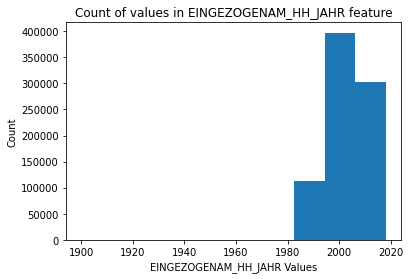

In [238]:
plt.hist(azdias['EINGEZOGENAM_HH_JAHR']);
plt.title("Count of values in EINGEZOGENAM_HH_JAHR feature")
plt.xlabel("EINGEZOGENAM_HH_JAHR Values")
plt.ylabel("Count")

In [239]:
fillna_mode('EINGEZOGENAM_HH_JAHR')

### KONSUMNAEHE Column

In [240]:
azdias['KONSUMNAEHE'].isnull().sum()

28388

In [241]:
azdias['KONSUMNAEHE'].value_counts()

1.0    192376
3.0    169948
5.0    152481
2.0    133734
4.0    132421
6.0     26437
7.0      4210
Name: KONSUMNAEHE, dtype: int64

In [242]:
fillna_mode('KONSUMNAEHE')

### KONSUMZELLE Column

In [243]:
azdias['KONSUMZELLE'].isnull().sum()

47457

Text(0, 0.5, 'Count')

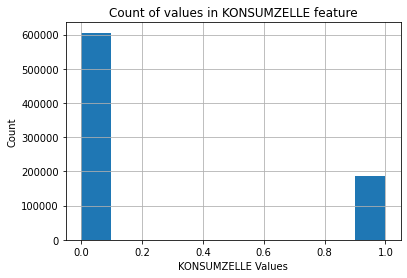

In [244]:
azdias['KONSUMZELLE'].hist();
plt.title("Count of values in KONSUMZELLE feature")
plt.xlabel("KONSUMZELLE Values")
plt.ylabel("Count")

No information available for KONSUMZELLE column but, it is a binary value related to consumption and the precentage of missing values so, we can add the mising values to the mode.

In [245]:
fillna_mode('KONSUMZELLE')

### TITEL_KZ Column

In [246]:
azdias['TITEL_KZ'].isnull().sum()

27921

In [247]:
azdias['TITEL_KZ'].value_counts()

0.0    809939
1.0      1925
5.0       102
4.0        57
3.0        48
2.0         3
Name: TITEL_KZ, dtype: int64

In [248]:
impute_missing_values('TITEL_KZ',0)

### AKT_DAT_KL Column

In [249]:
azdias['AKT_DAT_KL'].isnull().sum()

27921

Text(0, 0.5, 'Count')

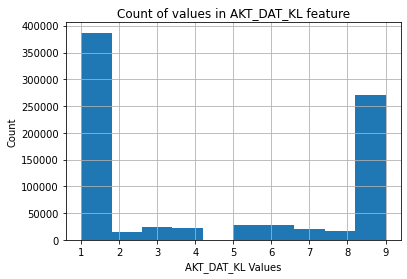

In [250]:
azdias['AKT_DAT_KL'].hist();
plt.title("Count of values in AKT_DAT_KL feature")
plt.xlabel("AKT_DAT_KL Values")
plt.ylabel("Count")

In [251]:
azdias.dropna(subset=['AKT_DAT_KL'],how='any',inplace=True)

In [252]:
customers_final.dropna(subset=['AKT_DAT_KL'],how='any',inplace=True)

### VHN and VHA Column

In [253]:
azdias['VHN'].value_counts()

2.0    232192
3.0    178352
4.0    177181
1.0    140407
0.0     36615
Name: VHN, dtype: int64

In [254]:
azdias['VHA'].value_counts()

0.0    661047
1.0     80364
4.0     24294
5.0     22238
3.0     19296
2.0      4835
Name: VHA, dtype: int64

In [255]:
fillna_mode('VHN')

In [256]:
azdias['VHA'].isnull().sum()

0

### UNGLEICHENN_FLAG Column

In [257]:
azdias['UNGLEICHENN_FLAG'].isnull().sum()

0

Text(0, 0.5, 'Count')

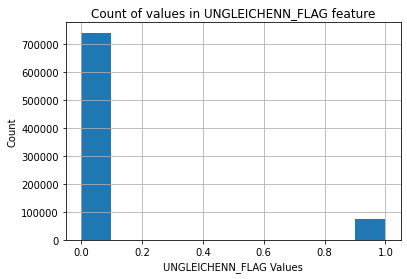

In [258]:
azdias['UNGLEICHENN_FLAG'].hist();
plt.title("Count of values in UNGLEICHENN_FLAG feature")
plt.xlabel("UNGLEICHENN_FLAG Values")
plt.ylabel("Count")

### GEMEINDETYP, STRUKTURTYP Columns

In [259]:
azdias[['GEMEINDETYP', 'STRUKTURTYP']].isnull().sum()

GEMEINDETYP    23626
STRUKTURTYP    23626
dtype: int64

In [260]:
azdias['GEMEINDETYP'].value_counts()

22.0    150261
11.0    149677
40.0    124743
30.0    121531
12.0    119257
21.0     72277
50.0     50702
Name: GEMEINDETYP, dtype: int64

In [261]:
azdias['STRUKTURTYP'].value_counts()

3.0    551763
1.0    126780
2.0    109905
Name: STRUKTURTYP, dtype: int64

In [262]:
fillna_mode('GEMEINDETYP')

In [263]:
fillna_mode('STRUKTURTYP')

In [264]:
azdias.isnull().mean().sort_values(ascending=False)

ALTERSKATEGORIE_GROB      0.0
HEALTH_TYP                0.0
HH_EINKOMMEN_SCORE        0.0
INNENSTADT                0.0
KBA05_ALTER1              0.0
                         ... 
KBA13_KMH_250             0.0
KBA13_KMH_251             0.0
KBA13_KRSAQUOT            0.0
KBA13_KRSHERST_AUDI_VW    0.0
LNR                       0.0
Length: 364, dtype: float64

In [265]:
azdias.shape

(812074, 364)

In [266]:
customers_final.isnull().mean().sort_values(ascending=False)

ALTERSKATEGORIE_GROB      0.0
HEALTH_TYP                0.0
HH_EINKOMMEN_SCORE        0.0
INNENSTADT                0.0
KBA05_ALTER1              0.0
                         ... 
KBA13_KMH_250             0.0
KBA13_KMH_251             0.0
KBA13_KRSAQUOT            0.0
KBA13_KRSHERST_AUDI_VW    0.0
LNR                       0.0
Length: 364, dtype: float64

In [267]:
missing_values_dict

{'KBA13_ALTERHALTER_30': -1,
 'KBA13_ALTERHALTER_45': -1,
 'KBA13_ALTERHALTER_60': -1,
 'KBA13_ALTERHALTER_61': -1,
 'KBA13_ANTG1': -1,
 'KBA13_ANTG2': -1,
 'KBA13_ANTG3': -1,
 'KBA13_ANTG4': -1,
 'KBA13_ANZAHL_PKW': -1,
 'KBA13_AUDI': -1,
 'KBA13_AUTOQUOTE': -1,
 'KBA13_BAUMAX': -1,
 'KBA13_BJ_1999': -1,
 'KBA13_BJ_2000': -1,
 'KBA13_BJ_2004': -1,
 'KBA13_BJ_2006': -1,
 'KBA13_BJ_2008': -1,
 'KBA13_BJ_2009': -1,
 'KBA13_BMW': -1,
 'KBA13_CCM_0_1400': -1,
 'KBA13_CCM_1000': -1,
 'KBA13_CCM_1200': -1,
 'KBA13_CCM_1400': -1,
 'KBA13_CCM_1401_2500': -1,
 'KBA13_CCM_1500': -1,
 'KBA13_CCM_1600': -1,
 'KBA13_CCM_1800': -1,
 'KBA13_CCM_2000': -1,
 'KBA13_CCM_2500': -1,
 'KBA13_CCM_2501': -1,
 'KBA13_CCM_3000': -1,
 'KBA13_CCM_3001': -1,
 'KBA13_FAB_ASIEN': -1,
 'KBA13_FAB_SONSTIGE': -1,
 'KBA13_FIAT': -1,
 'KBA13_FORD': -1,
 'KBA13_GBZ': -1,
 'KBA13_HALTER_20': -1,
 'KBA13_HALTER_25': -1,
 'KBA13_HALTER_30': -1,
 'KBA13_HALTER_35': -1,
 'KBA13_HALTER_40': -1,
 'KBA13_HALTER_45': -1,
 'KBA13_

In [268]:
len(missing_values_dict.keys())

261

## Part I: General Population and customers segmentation (Unsupervised Modeling)

In this part we will use KMeans algorithm to cluster the general population and customers databases. Also, PCA will be used to reduce the dimensions of the data sets.

In [269]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans

In [270]:
pca_pipeline = Pipeline ([('ss',StandardScaler()),
                          ('pca',PCA(n_components=364))])

In [271]:
x = pca_pipeline.fit_transform(azdias)

In [272]:
x.shape

(812074, 364)

In [273]:
pca_explained_variance = pca_pipeline.named_steps['pca'].explained_variance_ratio_

In [274]:
np.percentile(pca_explained_variance,75)

0.0020704389535459253

Text(0, 0.5, 'Explained Variance Ratio')

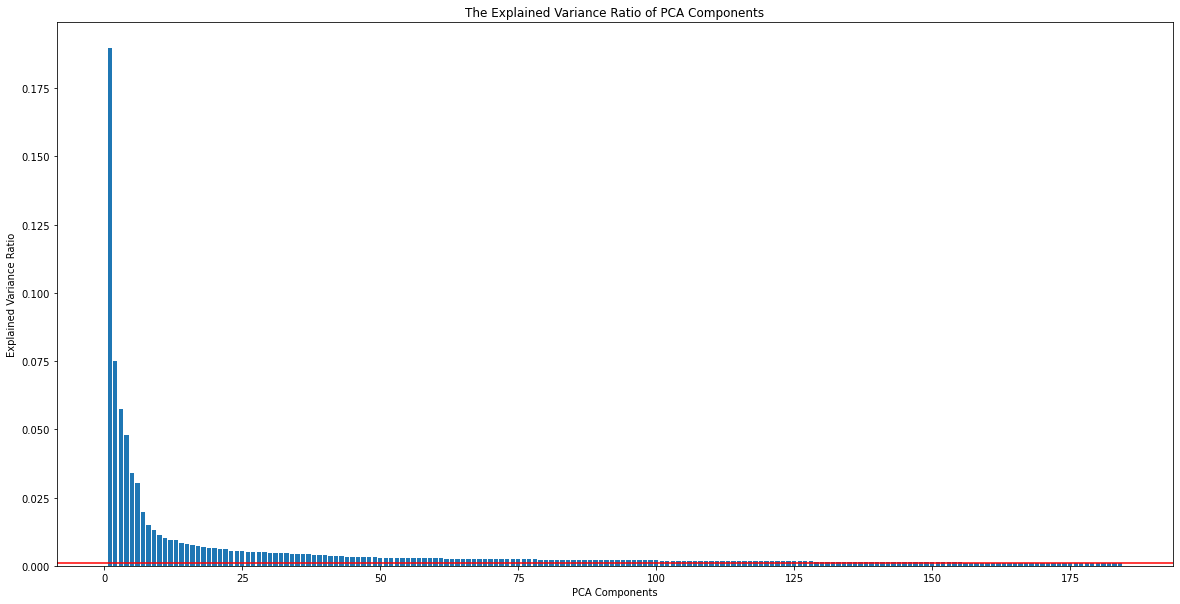

In [275]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(1,185,1), height=pca_explained_variance[:184])
plt.axhline(np.percentile(pca_explained_variance,50),0,1,c='r')
plt.title("The Explained Variance Ratio of PCA Components")
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance Ratio")

In [276]:
np.where(pca_explained_variance > np.percentile(pca_explained_variance,50))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

**In order to choose the proper value of components in PCA we have to use, different number of components and feed it to the ML model (KMeans in our case) and choose the number of components that fulfill the best perforrmance of the model.
It took too much time to iterate the different values of n_components and calculate the inertia for each iterate to plot the elbow curve. Therefore, about 93.6% of the variance explained by half of the PCA component. 182 components will be used for KMeans clustering model.**

From the pca_explained_variance out of PCA, 93% of the variance is in the first 182 components, so we will take this components to the next step to train the model.

In [277]:
pca_explained_variance[:181].sum()

0.9357435764336404

In [278]:
# PCA for 182 components
pca_pipeline = Pipeline ([('ss',StandardScaler()),
                          ('pca',PCA(n_components=182))])
x = pca_pipeline.fit_transform(azdias)

In [279]:
k_list=list(range(2,17)) #Number of clusters
inertia1=[]

for k in k_list:
    kmc = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, 
                 tol=0.0001, verbose=0, random_state=0, copy_x=True, algorithm='auto')
    kmc.fit(x)
    inertia1.append(kmc.inertia_)

In [280]:
inertia1

[228334830.7965942,
 214610574.8221597,
 193117155.08642828,
 185768397.86856183,
 181856588.92961937,
 178652681.58734572,
 175693562.35019165,
 173328528.2286526,
 171575218.65738556,
 170026905.49361613,
 168702524.80513167,
 167355102.82372075,
 166152641.2318655,
 165156493.71872637,
 164168539.0561665]

Text(0.5, 1.0, 'Elbow Curve of KMeans')

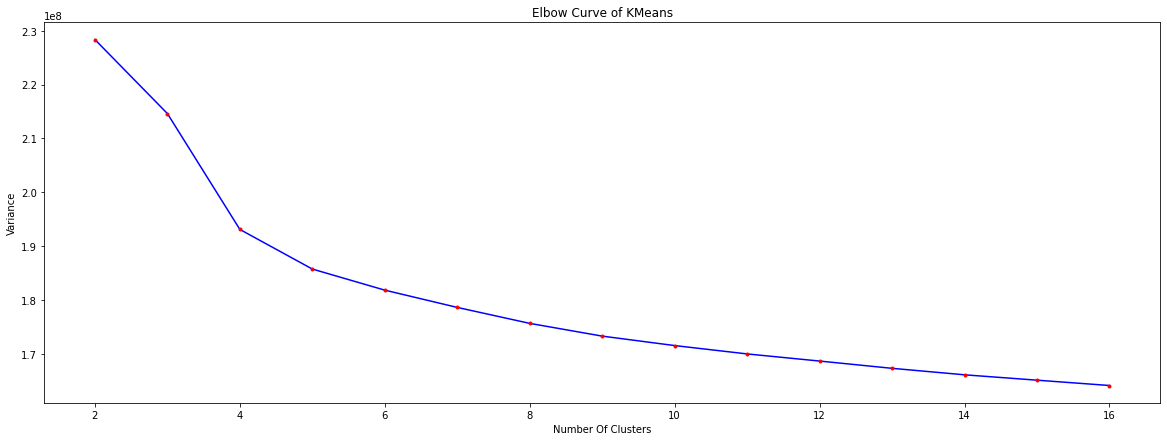

In [281]:
plt.figure(figsize=(20,7))
plt.plot(k_list,inertia1,'-b')
plt.plot(k_list,inertia1,'.r')
plt.xlabel('Number Of Clusters')
plt.ylabel('Variance')
plt.title('Elbow Curve of KMeans')

**From the elbow curve, at the point of 4 clusters, the change in variance decrease significanty, but there is still some variance in the curve. After the point of 6 clusters the decrease of the variance between points was almost the same. so, we can choose 6 clusters as the best number of clusters.**

By plotting the change in variance between points, 6 clusters is the elbow point.

Text(0.5, 1.0, 'Elbow Curve of KMeans')

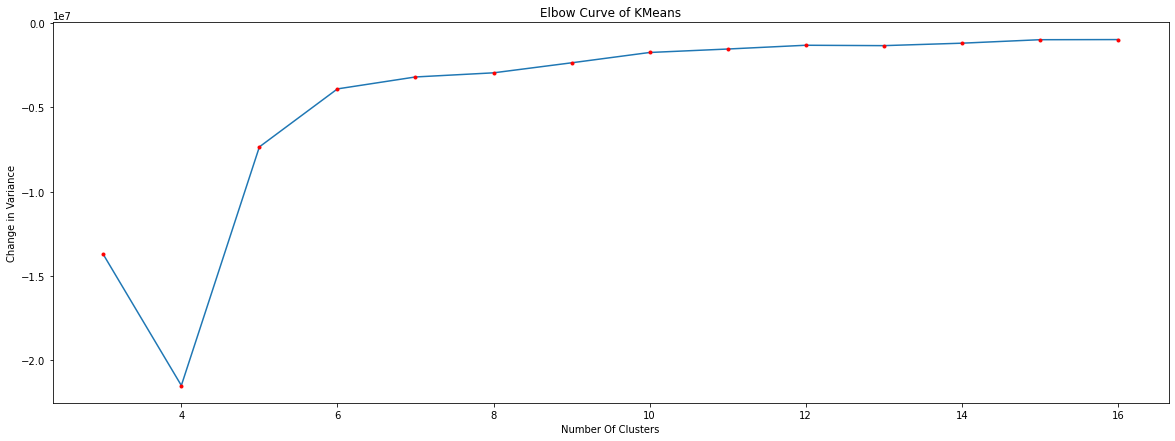

In [282]:
k_list1 = list(range(3,17))
plt.figure(figsize=(20,7))
plt.plot(k_list1,np.ediff1d(inertia1))
plt.plot(k_list1,np.ediff1d(inertia1),'.r')
plt.xlabel('Number Of Clusters')
plt.ylabel('Change in Variance')
plt.title('Elbow Curve of KMeans')

Now we can predict the labels and get an overview of how the points classified in the first and second PCA components.

In [296]:
kmeans_pipeline =  Pipeline ([('ss',StandardScaler()),
                          ('pca',PCA(n_components=182)),
                             ('kmc', KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, 
                 tol=0.0001, verbose=0, random_state=0, copy_x=True, algorithm='auto'))])

In [297]:
customers_labels = kmeans_pipeline.fit_predict(customers_final)
kmc_labels = kmeans_pipeline.fit_predict(azdias)

Text(0, 0.5, 'PCA2')

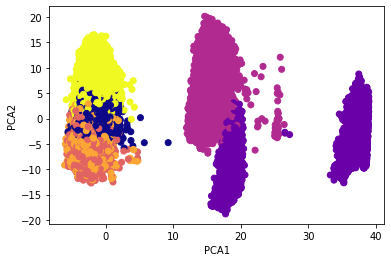

In [298]:
plt.scatter(x[:,0],x[:,1],c=kmc_labels,cmap='plasma')
plt.xlabel("PCA1")
plt.ylabel("PCA2")

Text(0.5, 1.0, 'Count of customers in each cluster in AZDIAS dataset ')

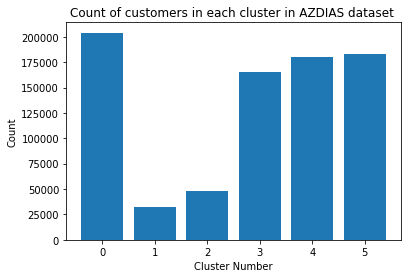

In [299]:
kmc_labels_ser = pd.Series(kmc_labels).value_counts()
plt.bar(kmc_labels_ser.index,height=kmc_labels_ser)
plt.xlabel("Cluster Number")
plt.ylabel("Count")
plt.title("Count of customers in each cluster in AZDIAS dataset ")

In [300]:
kmc_labels_ser

0    203965
5    183144
4    179759
3    165331
2     47777
1     32098
dtype: int64

From the labels of users in AZDIAS dataset, we se that the majority belong to cluster 0, cluster 3, cluster 4 and cluster 5.<br>The second step is to fit customers data set to the same model and find customers belong to which cluster.

Text(0.5, 1.0, 'Count of customers in each cluster in CUSTOMERS dataset ')

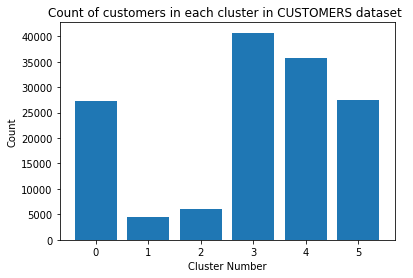

In [301]:
customers_labels_ser = pd.Series(customers_labels).value_counts()
plt.bar(customers_labels_ser.index,height=customers_labels_ser)
plt.xlabel("Cluster Number")
plt.ylabel("Count")
plt.title("Count of customers in each cluster in CUSTOMERS dataset ")

In [303]:
customers_labels_ser

3    40689
4    35789
5    27446
0    27283
2     6044
1     4577
dtype: int64

From The distribution of the customers on the clusters, We can conclude the following points.
- Customers data sets and AZDIAS data set have both roughly the same distribution of clusters.
- Majority of customers belong to cluster 3, however this cluster is not the major in the general population.
- Cluster 0 and cluster 5 has almost equal count in CUSTOMERS data set.
- We can study cluster 0 and cluster 5 as a group and cluster 3 and cluster 4 as one group.
- More focus on cluster 3 can lead to some of the common characteristics of the customers.

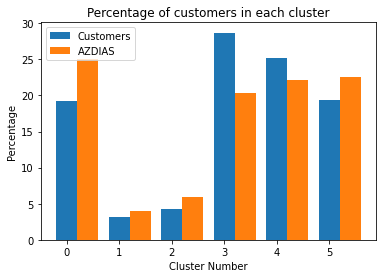

In [306]:
bar1=customers_labels_ser.index
bar2=kmc_labels_ser.index
w=0.4
plt.bar(bar1,height=customers_labels_ser*100/customers_final.shape[0],width=w,label='customers')
plt.bar(bar2+w,height=kmc_labels_ser*100/azdias.shape[0],width=w,label='AZDIAS')
plt.xlabel("Cluster Number")
plt.ylabel("Percentage")
plt.title("Percentage of customers in each cluster")
plt.legend(['Customers','AZDIAS'],loc='upper left')

In [307]:
len(customers_labels)

141828

In [308]:
customers_final.shape

(141828, 365)

In [309]:
customers_final['CLUSTER']=customers_labels

In [310]:
customers_final['CLUSTER']

0         3
2         0
3         3
4         4
5         5
         ..
191647    5
191648    3
191649    3
191650    4
191651    4
Name: CLUSTER, Length: 141828, dtype: int32

In [317]:
customers_final[customers_final['CLUSTER']==3]

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CLUSTER
0,9626,2,1.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,3.0,2.0,6.0,9.0,7.0,3,1,4,3
3,143873,1,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,4.0,2.0,0.0,9.0,7.0,1,1,4,3
6,143904,2,1.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,4.0,2.0,6.0,9.0,7.0,1,1,4,3
19,110322,-1,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,5.0,8.0,6.0,6.0,8.0,3.0,3,2,4,3
22,110336,2,1.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,...,7.0,8.0,5.0,6.0,9.0,7.0,3,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191635,55815,2,1.0,14.0,0.0,0.0,0.0,0.0,1.0,0.0,...,8.0,6.0,3.0,6.0,9.0,3.0,3,2,4,3
191636,55817,2,1.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,6.0,9.0,1.0,2,1,4,3
191641,55838,1,1.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,6.0,3.0,6.0,9.0,7.0,1,1,4,3
191648,154563,-1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,7.0,4.0,0.0,9.0,3.0,3,2,4,3


In [312]:
customers_final.shape

(141828, 365)

In [313]:
customers_final['CLUSTER'].value_counts()

3    40689
4    35789
5    27446
0    27283
2     6044
1     4577
Name: CLUSTER, dtype: int64

In [315]:
clusters_mode_df=pd.DataFrame()
for k in np.unique(customers_labels):
    clusters_mode_df[f"Cluster_{k}"] = customers_final[customers_final['CLUSTER']==k].apply(lambda x:x.mode()[0],axis=0)
clusters_mode_df.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
LNR,3,4,18,2,17,1
AGER_TYP,2,2,-1,2,-1,1
AKT_DAT_KL,1,1,1,1,1,1
ALTER_HH,0,0,0,0,21,0
ALTER_KIND1,0,0,0,0,0,0


In cluster_mode_df dataframe we see the most frequent values in each cluster. But, we need to find the most frequent value in each cluster but a threshold (50%) to get the common characteristics between the clusters.

In [316]:
clusters_df=pd.DataFrame()
for k in np.unique(customers_labels):
    for col in customers_final.columns:
        mode_value = customers_final[customers_final['CLUSTER']==k][col].value_counts(ascending=False,normalize=True)
        if mode_value.values[0] >= 0.5:
            clusters_df.loc[col,f"Cluster_{k}"] = mode_value.index[0]
        else:
            clusters_df.loc[col,f"Cluster_{k}"] = np.nan
clusters_df.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
LNR,NaN,NaN,NaN,NaN,NaN,NaN
AGER_TYP,NaN,NaN,-1.0,NaN,NaN,NaN
AKT_DAT_KL,1.0,1,1.0,1.0,1.0,1.0
ALTER_HH,NaN,NaN,NaN,NaN,NaN,NaN
ALTER_KIND1,0.0,0,0.0,0.0,0.0,0.0


In [331]:
clusters_df[clusters_df['Cluster_3'].notnull()]['Cluster_3'][80:-20]

FINANZ_MINIMALIST              5.0
FINANZ_SPARER                  1.0
FINANZ_VORSORGER               5.0
GEBAEUDETYP                    1.0
GEBAEUDETYP_RASTER             4.0
GREEN_AVANTGARDE               0.0
HH_DELTA_FLAG                  0.0
KBA05_ANHANG                   1.0
KBA05_ANTG3                    0.0
KBA05_ANTG4                    0.0
KBA05_BAUMAX                   1.0
KBA05_KRSKLEIN                 2.0
KBA05_KRSOBER                  2.0
KBA05_KRSVAN                   2.0
KBA05_KRSZUL                   2.0
KBA05_MAXVORB                  2.0
KBA05_MOTRAD                   1.0
KBA05_SEG6                     0.0
KBA13_ANTG4                    0.0
KBA13_AUTOQUOTE                3.0
KBA13_BAUMAX                   1.0
KBA13_BJ_2000                  3.0
KBA13_BMW                      3.0
KBA13_CCM_1400                 3.0
KBA13_CCM_1401_2500            3.0
KBA13_HALTER_20                3.0
KBA13_HALTER_25                3.0
KBA13_HALTER_65                3.0
KBA13_HERST_BMW_BENZ

In [332]:
clusters_df[clusters_df['Cluster_3']==clusters_df['Cluster_4']][['Cluster_3','Cluster_4']][:60]

,Cluster_3,Cluster_4
AKT_DAT_KL,1.0,1.0
ALTER_KIND1,0.0,0.0
ALTER_KIND2,0.0,0.0
ALTER_KIND3,0.0,0.0
ALTER_KIND4,0.0,0.0
ANZ_HAUSHALTE_AKTIV,1.0,1.0
ANZ_HH_TITEL,0.0,0.0
ANZ_KINDER,0.0,0.0
ANZ_STATISTISCHE_HAUSHALTE,1.0,1.0
ANZ_TITEL,0.0,0.0


In [336]:
clusters_df[clusters_df['Cluster_0']==clusters_df['Cluster_5']][['Cluster_0','Cluster_5']][60:]

,Cluster_0,Cluster_5
D19_VERSI_ONLINE_DATUM,10.0,10.0
D19_VERSI_ONLINE_QUOTE_12,0.0,0.0
D19_VERSICHERUNGEN,0.0,0.0
D19_WEIN_FEINKOST,0.0,0.0
DSL_FLAG,1.0,1.0
FINANZ_ANLEGER,1.0,1.0
FINANZ_SPARER,1.0,1.0
FINANZ_VORSORGER,5.0,5.0
HH_DELTA_FLAG,0.0,0.0
KBA05_ANTG4,0.0,0.0


In [337]:
similarity_df=pd.DataFrame()
for k in range(8):
    for col in col_group_dict.keys():
        try:
            similarity_df.loc[f"Cluster{k}",col] = customers_final[customers_final['CLUSTER']==k][col_group_dict[col]].duplicated().mean()
        except KeyError:
            continue

From another point of view we can study the cloumn groups with respect to the clusters.<br>We can find the common between customers by finding the precentage of duplications in each group.

In [338]:
similarity_df

,col_KBA13,col_D19,col_KBA05,col_SEMIO,col_CJT,col_PLZ8,col_ANZ,col_FINANZ,col_LP,col_ALTER,...,col_VHN,col_FINANZTYP,col_EINGEZOGENAM,col_VERS,col_EWDICHTE,col_UNGLEICHENN,col_STRUKTURTYP,col_ONLINE,col_KK,col_GEMEINDETYP
Cluster0,0.432137,0.145475,0.060624,0.308544,0.814866,0.969358,0.816662,0.948210,0.993183,0.987025,...,0.999817,0.999780,0.998827,0.999890,0.999780,0.999927,0.999890,0.999780,0.999743,0.999743
Cluster1,0.999782,0.065982,0.896657,0.826087,0.607166,0.988639,0.892724,0.893380,0.964606,0.945161,...,0.998908,0.998689,0.993445,0.999345,0.998471,0.999563,0.999345,0.998689,0.998471,0.998471
Cluster2,0.158835,0.078094,0.958802,0.783256,0.687128,0.918266,0.788882,0.895103,0.972535,0.913799,...,0.999173,0.999007,0.995533,0.999504,0.998842,0.999669,0.999504,0.999007,0.998842,0.998842
Cluster3,0.452358,0.135123,0.045811,0.403377,0.905896,0.984812,0.978127,0.976357,0.995896,0.991669,...,0.999877,0.999853,0.999189,0.999926,0.999828,0.999951,0.999926,0.999853,0.999828,0.999828
Cluster4,0.379502,0.018134,0.041353,0.383693,0.788538,0.980413,0.960323,0.948364,0.994579,0.960938,...,0.999860,0.999832,0.999106,0.999916,0.999804,0.999944,0.999916,0.999860,0.999804,0.999804
Cluster5,0.610289,0.033265,0.080558,0.532609,0.878015,0.976937,0.948663,0.975042,0.994498,0.985608,...,0.999818,0.999781,0.998798,0.999891,0.999781,0.999927,0.999891,0.999781,0.999745,0.999745
Cluster6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cluster7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
df4 = customers_final[customers_final['CLUSTER']==3][col_group_dict['col_SEMIO']]
df4[df4.duplicated()]

,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT
471,3,3,4,1,3,4,7,6,4,3,5,3,4,7
2409,3,4,4,4,3,4,4,4,4,3,4,6,4,6
2412,3,3,4,3,3,6,7,4,4,3,3,6,4,7
2581,3,7,5,3,3,6,5,4,2,3,3,6,2,6
2624,3,3,5,1,3,4,7,6,1,1,5,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191624,3,3,5,2,3,6,7,4,4,3,5,6,4,7
191630,2,4,4,3,1,5,4,4,4,2,4,6,2,5
191636,3,3,5,2,3,4,5,1,2,1,5,6,1,6
191641,1,3,5,1,3,6,7,6,2,3,5,6,1,6


Cluster 3 customers have the following common attributes.

-	They have a very low financial minimalism behaviour and very high financial saving behaviour.
-	They live in residential buildings.
-	They have one active household in the cell.
-	Their customer journey topology categories are, ‘advertising and consumption minimalist’ and ‘advertising and cross-channel ethaustism’
-	Their share of car per household within PLZ8 is average.

Cluster 0 and Cluster 5 customers have the common attributes.

-	Most of them have german nationality as sounds from their names.
-	The age of most of them is more than 60 years old.
-	The share of small, upper class cars and van are average.
-	Their return type is ‘determined Minimal-Returner’


## Part II: Customers response prediction (Supervised Modeling)

In [340]:
mailout_train = pd.read_csv("Udacity_MAILOUT_052018_TRAIN.csv",delimiter=';',low_memory=False)
mailout_test = pd.read_csv("Udacity_MAILOUT_052018_TEST.csv",delimiter=';',low_memory=False)

In [341]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [342]:
mailout_test.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [343]:
mailout_train.shape, mailout_test.shape

((42962, 367), (42833, 366))

In [344]:
np.setdiff1d(mailout_train.columns,azdias.columns)

array(['ALTERSKATEGORIE_FEIN', 'EXTSEL992', 'RESPONSE'], dtype=object)

In [345]:
np.setdiff1d(mailout_train.columns,mailout_test.columns)

array(['RESPONSE'], dtype=object)

In [346]:
mailout_train.drop(columns=['ALTERSKATEGORIE_FEIN', 'EXTSEL992'],inplace=True)
mailout_test.drop(columns=['ALTERSKATEGORIE_FEIN', 'EXTSEL992'],inplace=True)

In [347]:
mailout_train.fillna(missing_values_dict,inplace=True)
mailout_test.fillna(missing_values_dict,inplace=True)

In [348]:
mailout_test[['ONLINE_AFFINITAET','GFK_URLAUBERTYP','RT_SCHNAEPPCHEN','RT_KEIN_ANREIZ','RETOURTYP_BK_S']].isnull().sum()

ONLINE_AFFINITAET    578
GFK_URLAUBERTYP      578
RT_SCHNAEPPCHEN      578
RT_KEIN_ANREIZ       578
RETOURTYP_BK_S       578
dtype: int64

In [349]:
subset_mode = mailout_test[['ONLINE_AFFINITAET','GFK_URLAUBERTYP','RT_SCHNAEPPCHEN','RT_KEIN_ANREIZ','RETOURTYP_BK_S']].apply(lambda x:x.mode()[0])

In [350]:
for col in subset_mode.index:
    mailout_train[col]= mailout_train[col].fillna(subset_mode[col])
    mailout_test[col]= mailout_test[col].fillna(subset_mode[col])

In [351]:
subset_mode

ONLINE_AFFINITAET    2.0
GFK_URLAUBERTYP      5.0
RT_SCHNAEPPCHEN      5.0
RT_KEIN_ANREIZ       1.0
RETOURTYP_BK_S       5.0
dtype: float64

In [352]:
mailout_test.isnull().mean().sort_values(ascending=False)[:10]

EINGEFUEGT_AM         0.178064
UNGLEICHENN_FLAG      0.160834
AKT_DAT_KL            0.160834
VHA                   0.160834
RT_UEBERGROESSE       0.145145
KBA05_ANTG2           0.000000
HH_EINKOMMEN_SCORE    0.000000
INNENSTADT            0.000000
KBA05_ALTER1          0.000000
KBA05_ALTER2          0.000000
dtype: float64

In [353]:
mailout_train.isnull().mean().sort_values(ascending=False)[:10]

EINGEFUEGT_AM           0.181020
AKT_DAT_KL              0.162213
VHA                     0.162213
UNGLEICHENN_FLAG        0.162213
RT_UEBERGROESSE         0.148503
ALTERSKATEGORIE_GROB    0.000000
KBA05_ANTG3             0.000000
INNENSTADT              0.000000
KBA05_ALTER1            0.000000
KBA05_ALTER2            0.000000
dtype: float64

## Categorical Features

In [354]:
mailout_train.dtypes.index[mailout_train.dtypes=='O']

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

In [355]:
mailout_train['EINGEFUEGT_AM'] = pd.to_datetime(mailout_train['EINGEFUEGT_AM']).bfill()
mailout_train['EINGEFUEGT_AM'] = (pd.to_datetime('2021-09-25') - mailout_train['EINGEFUEGT_AM']).astype('timedelta64[h]')/24

In [356]:
mailout_test['EINGEFUEGT_AM'] = pd.to_datetime(mailout_test['EINGEFUEGT_AM']).bfill()
mailout_test['EINGEFUEGT_AM'] = (pd.to_datetime('2021-09-25') - mailout_test['EINGEFUEGT_AM']).astype('timedelta64[h]')/24

In [357]:
mapping_dict={'-1': -1, '8A': 2, '4C': 3, '2A': 4,
 '6B': 5, '8C': 6, '4A': 7, '2D': 8, '1A': 9, '1E': 10, '9D': 11, '5C': 12, '8B': 13,
'7A': 14, '5D': 15, '9E': 16, '9B': 17, '1B': 18, '3D': 19, '4E': 20, '4B': 21, '3C': 22, 
'5A': 23, '7B': 24, '9A': 25, '6D': 26, '6E': 27, '2C': 28, '7C': 29, '9C': 30, '7D': 31, 
'5E': 32, '1D': 33, '8D': 34, '6C': 35, '6A': 36, '5B': 37, '4D': 38, '3A': 39, '2B': 40, '7E': 41, 
                                         '3B': 42, '6F': 43, '5F': 44, '1C': 45,'XX':-1}
mailout_train['CAMEO_DEU_2015'] = mailout_train['CAMEO_DEU_2015'].replace(mapping_dict)
mailout_test['CAMEO_DEU_2015'] = mailout_test['CAMEO_DEU_2015'].replace(mapping_dict)

In [358]:
mailout_train['CAMEO_DEU_2015'].unique()

array([15, 37,  8, 24,  3, 12, -1, 19, 23, 28,  7,  5,  9, 34, 21, 14, 20,
       39, 29, 11,  2, 32, 13, 22, 27, 38, 40, 42, 41,  4, 35, 45, 26, 31,
       33,  6, 25, 17, 30, 16, 43, 10, 36, 44, 18], dtype=int64)

In [359]:
mapping_dict={-1: 1, 'W': 2, 'O': 3}
mailout_train['OST_WEST_KZ'] = mailout_train['OST_WEST_KZ'].replace(mapping_dict)
mailout_test['OST_WEST_KZ'] = mailout_test['OST_WEST_KZ'].replace(mapping_dict)

In [360]:
mailout_train['OST_WEST_KZ'].unique()

array([2, 3, 1], dtype=int64)

In [361]:
mapping_dict={'D19_UNBEKANNT': 1, 'D19_SCHUHE': 2, 'D19_ENERGIE': 3, 'D19_KOSMETIK': 4, 'D19_VOLLSORTIMENT': 5, 'D19_SONSTIGE': 6, 'D19_BANKEN_GROSS': 7, 'D19_DROGERIEARTIKEL': 8, 'D19_HANDWERK': 9, 'D19_BUCH_CD': 10, 'D19_VERSICHERUNGEN': 11, 'D19_VERSAND_REST': 12, 'D19_TELKO_REST': 13, 'D19_BANKEN_DIREKT': 14, 'D19_BANKEN_REST': 15, 'D19_FREIZEIT': 16, 'D19_LEBENSMITTEL': 17, 'D19_HAUS_DEKO': 18, 'D19_BEKLEIDUNG_REST': 19, 'D19_SAMMELARTIKEL': 20, 'D19_TELKO_MOBILE': 21, 'D19_REISEN': 22, 'D19_BEKLEIDUNG_GEH': 23, 'D19_TECHNIK': 24, 'D19_NAHRUNGSERGAENZUNG': 25, 'D19_DIGIT_SERV': 26, 'D19_LOTTO': 27, 'D19_RATGEBER': 28, 'D19_TIERARTIKEL': 29, 'D19_KINDERARTIKEL': 30, 'D19_BIO_OEKO': 31, 'D19_WEIN_FEINKOST': 32, 'D19_GARTEN': 33, 'D19_BILDUNG': 34, 'D19_BANKEN_LOKAL': 35}
mailout_train['D19_LETZTER_KAUF_BRANCHE'] = mailout_train['D19_LETZTER_KAUF_BRANCHE'].replace(mapping_dict)
mailout_test['D19_LETZTER_KAUF_BRANCHE'] = mailout_test['D19_LETZTER_KAUF_BRANCHE'].replace(mapping_dict)

In [362]:
mailout_train.dtypes.index[mailout_train.dtypes=='O']

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')

In [363]:
mailout_train['CAMEO_DEUG_2015'].value_counts()

-1    7888
6     5363
4     5131
8     5010
2     4703
3     4423
7     3064
5     2531
9     2460
1     2378
X       11
Name: CAMEO_DEUG_2015, dtype: int64

In [364]:
mailout_train['CAMEO_DEUG_2015'] = mailout_train['CAMEO_DEUG_2015'].apply(lambda x:np.where(x=='X','-1',x))
mailout_test['CAMEO_DEUG_2015'] = mailout_test['CAMEO_DEUG_2015'].apply(lambda x:np.where(x=='X','-1',x))

In [365]:
mailout_train['CAMEO_INTL_2015'].value_counts()

-1    7888
24    4210
14    3674
51    3214
41    3064
25    2455
43    2452
45    1906
54    1856
22    1684
13    1633
55    1546
23    1205
15    1177
34     965
44     761
31     725
35     614
12     597
52     465
32     438
33     422
XX      11
Name: CAMEO_INTL_2015, dtype: int64

In [366]:
mailout_train['CAMEO_INTL_2015'] = mailout_train['CAMEO_INTL_2015'].apply(lambda x:np.where(x=='XX','-1',x))
mailout_test['CAMEO_INTL_2015'] = mailout_test['CAMEO_INTL_2015'].apply(lambda x:np.where(x=='XX','-1',x))

In [367]:
mailout_train['CAMEO_DEUG_2015'] = mailout_train['CAMEO_DEUG_2015'].astype(int)
mailout_train['CAMEO_INTL_2015'] = mailout_train['CAMEO_INTL_2015'].astype(int)
mailout_test['CAMEO_DEUG_2015'] = mailout_test['CAMEO_DEUG_2015'].astype(int)
mailout_test['CAMEO_INTL_2015'] = mailout_test['CAMEO_INTL_2015'].astype(int)

In [368]:
mailout_train.dtypes.index[mailout_train.dtypes=='O']

Index([], dtype='object')

In [369]:
mailout_train.isnull().mean().sort_values(ascending=False)

UNGLEICHENN_FLAG        0.162213
AKT_DAT_KL              0.162213
VHA                     0.162213
RT_UEBERGROESSE         0.148503
ALTERSKATEGORIE_GROB    0.000000
                          ...   
KBA13_KMH_210           0.000000
KBA13_KMH_211           0.000000
KBA13_KMH_250           0.000000
KBA13_KMH_251           0.000000
LNR                     0.000000
Length: 365, dtype: float64

In [370]:
mailout_train.drop(columns=['UNGLEICHENN_FLAG','AKT_DAT_KL','RT_UEBERGROESSE','VHA'],inplace=True)
mailout_test.drop(columns=['UNGLEICHENN_FLAG','AKT_DAT_KL','RT_UEBERGROESSE','VHA'],inplace=True)

In [371]:
mailout_train.isnull().sum().sort_values(ascending=False)

ALTERSKATEGORIE_GROB    0
HEALTH_TYP              0
HH_EINKOMMEN_SCORE      0
INNENSTADT              0
KBA05_ALTER1            0
                       ..
KBA13_KMH_210           0
KBA13_KMH_211           0
KBA13_KMH_250           0
KBA13_KMH_251           0
LNR                     0
Length: 361, dtype: int64

Text(0.5, 1.0, 'Count of RESPOSE feature')

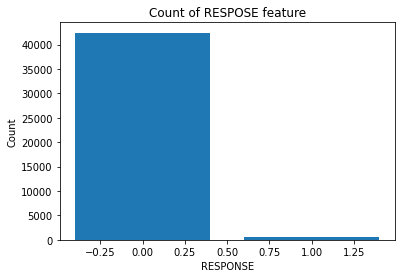

In [372]:
plt.bar(x=[0,1],height=mailout_train['RESPONSE'].value_counts())
plt.xlabel("RESPONSE")
plt.ylabel("Count")
plt.title("Count of RESPOSE feature")

### Supervised ML Modeling

In [373]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import skopt
from skopt import BayesSearchCV

In [374]:
X_train = mailout_train.drop(columns=['RESPONSE'])

In [375]:
y_train = mailout_train['RESPONSE']

In [376]:
def plot_roc(model,cv,X,y):
    '''
    A function to plot ROC curve for a classification model with cross validation scores and the mean AUC.
    INPUT:
    model: An object of the model.
    cv: The cross-validation object to be called in splitting and fitting the data
    X: The dependent feature dataframe.
    y: The independent variable numpy array.
    OUTPUT: ROC curve display 
    '''
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[[train],:].reshape(len(train),-1), y.iloc[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[[test],:].reshape(len(test),-1),
            y.iloc[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,)
    
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver Operating Curve of {}".format(model),
    )
    ax.legend(loc="lower right")
    plt.show()


In [377]:
def plot_test_roc(model,cv,X,y):
    '''
    A function to plot ROC curve for a classification model with test data.
    INPUT:
    model: An object of the model.
    cv: The cross-validation object to be called in splitting and fitting the data
    X: The dependent feature dataframe.
    y: The independent variable numpy array.
    OUTPUT: ROC curve display of test data.
    '''
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots()
    #for i, (train, test) in enumerate(cv.split(X, y)):
    model.fit(X, y)
    viz = RocCurveDisplay.from_estimator(
        model,
        X,
        y,
        name="ROC",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,)
    
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver Operating Curve of {}".format(model),
    )
    ax.legend(loc="lower right")
    plt.show()


We will fit the data to four classification models and find the AUC score for each one to find out the best model. Stratified cross-validation will be used because of the imbalanced mailout data set.

c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


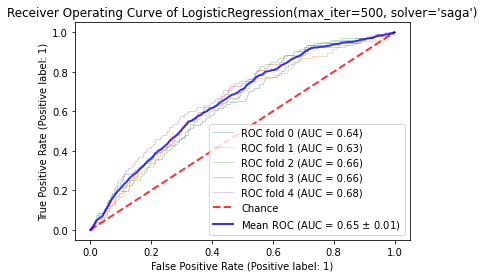

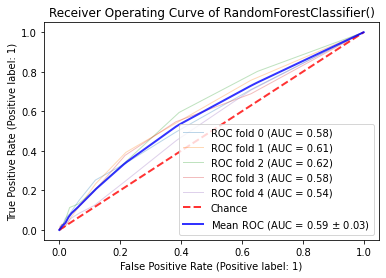

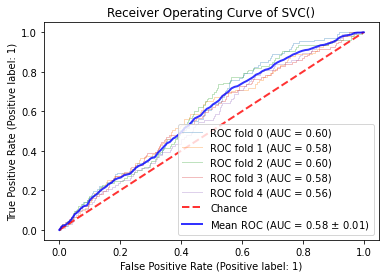

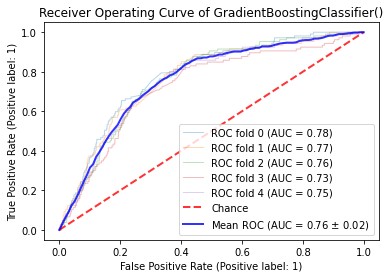

In [378]:
cls_models = {'logistic_regression' : LogisticRegression(solver='saga',max_iter=500), 'Random_Forest': RandomForestClassifier(),
             'SVM': svm.SVC(), 'GradientBoosting': GradientBoostingClassifier()}
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

for model in cls_models.keys():
    plot_roc(cls_models[model],cv=cv,X = X_train_scaled, y=y_train)


In [379]:
opt_cls_pipeline = Pipeline ([('ss',StandardScaler()),
                              ('cls',GradientBoostingClassifier())
                             ])

In [380]:
opt_cls_pipeline = Pipeline ([('ss',StandardScaler()),
                              ('cls',GradientBoostingClassifier())
                             ])

space = {
    'cls__loss': ['deviance', 'exponential'],
    'cls__learning_rate': [1e-3,0.01],
    'cls__n_estimators': [int(x) for x in np.linspace(100,500,num=5)],
    'cls__criterion': ['friedman_mse', 'squared_error'],
    'cls__min_samples_split': [2,3,10,15],
    'cls__max_depth': [int(x) for x in np.linspace(5,20,num=4)],
    'cls__min_samples_leaf': [ 5, 10, 15, 20],
    'cls__max_features': ['auto','sqrt','log2']
}

bayes_search_opt = BayesSearchCV(
    estimator = opt_cls_pipeline,
    search_spaces = space,
    cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
    n_iter=10, scoring = 'roc_auc',
    refit=True,verbose=2)

bayes_search_opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END cls__criterion=friedman_mse, cls__learning_rate=0.00809201315818733, cls__loss=exponential, cls__max_depth=15, cls__max_features=log2, cls__min_samples_leaf=10, cls__min_samples_split=2, cls__n_estimators=300; total time= 1.5min
[CV] END cls__criterion=friedman_mse, cls__learning_rate=0.00809201315818733, cls__loss=exponential, cls__max_depth=15, cls__max_features=log2, cls__min_samples_leaf=10, cls__min_samples_split=2, cls__n_estimators=300; total time= 1.3min
[CV] END cls__criterion=friedman_mse, cls__learning_rate=0.00809201315818733, cls__loss=exponential, cls__max_depth=15, cls__max_features=log2, cls__min_samples_leaf=10, cls__min_samples_split=2, cls__n_estimators=300; total time= 1.4min
[CV] END cls__criterion=friedman_mse, cls__learning_rate=0.00809201315818733, cls__loss=exponential, cls__max_depth=15, cls__max_features=log2, cls__min_samples_leaf=10, cls__min_samples_split=2, cls__n_estimators=300; total ti

[CV] END cls__criterion=friedman_mse, cls__learning_rate=0.005920484238076645, cls__loss=deviance, cls__max_depth=10, cls__max_features=log2, cls__min_samples_leaf=20, cls__min_samples_split=15, cls__n_estimators=400; total time= 1.0min
[CV] END cls__criterion=friedman_mse, cls__learning_rate=0.005920484238076645, cls__loss=deviance, cls__max_depth=10, cls__max_features=log2, cls__min_samples_leaf=20, cls__min_samples_split=15, cls__n_estimators=400; total time= 1.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END cls__criterion=squared_error, cls__learning_rate=0.007374430278503201, cls__loss=deviance, cls__max_depth=15, cls__max_features=log2, cls__min_samples_leaf=5, cls__min_samples_split=10, cls__n_estimators=100; total time=  42.0s
[CV] END cls__criterion=squared_error, cls__learning_rate=0.007374430278503201, cls__loss=deviance, cls__max_depth=15, cls__max_features=log2, cls__min_samples_leaf=5, cls__min_samples_split=10, cls__n_estimators=100; total time= 

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('ss', StandardScaler()),
                                        ('cls', GradientBoostingClassifier())]),
              n_iter=10, scoring='roc_auc',
              search_spaces={'cls__criterion': ['friedman_mse',
                                                'squared_error'],
                             'cls__learning_rate': [0.001, 0.01],
                             'cls__loss': ['deviance', 'exponential'],
                             'cls__max_depth': [5, 10, 15, 20],
                             'cls__max_features': ['auto', 'sqrt', 'log2'],
                             'cls__min_samples_leaf': [5, 10, 15, 20],
                             'cls__min_samples_split': [2, 3, 10, 15],
                             'cls__n_estimators': [100, 200, 300, 400, 500]},
              verbose=2)

In [381]:
print("best params: %s" % str(bayes_search_opt.best_params_))

best params: OrderedDict([('cls__criterion', 'friedman_mse'), ('cls__learning_rate', 0.007127142244266187), ('cls__loss', 'deviance'), ('cls__max_depth', 15), ('cls__max_features', 'auto'), ('cls__min_samples_leaf', 15), ('cls__min_samples_split', 10), ('cls__n_estimators', 200)])


In [386]:
print("train score: %s" % bayes_search_opt.score(X_train, y_train))

train score: 0.9967885850024544


This value is not an indication for the score of the model because the train data sets were used and the score of the model should be tested with a new test data.

In [383]:
print("val. score: %s" % bayes_search_opt.best_score_)

val. score: 0.727518099764804


**Note:** The values proovided in the report was better than this results as 20 iterations applied in Bayesian search. In this notebook the number of iterations set to 10 for the sake of time limitations. 

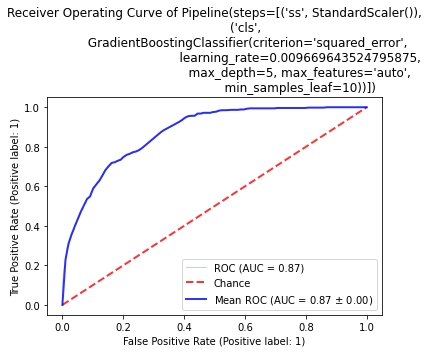

In [385]:
parameters = {'cls__criterion': 'squared_error', 
               'cls__learning_rate': 0.009669643524795875, 
               'cls__loss': 'deviance', 
               'cls__max_depth': 5, 
               'cls__max_features': 'auto', 
                'cls__min_samples_leaf': 10, 
               'cls__min_samples_split': 2, 
               'cls__n_estimators': 100}

opt_cls_pipeline = Pipeline ([('ss',StandardScaler()),
                              ('cls',GradientBoostingClassifier())
                             ])

opt_cls_pipeline.set_params(**parameters)
plot_test_roc(opt_cls_pipeline,cv,X_train,y_train)

This ROC curve represents the score of the train data but, a separated test data should be used for testing the model to avoid data leakage.<br> The model parameters are the best parameters with 20 iterations in Bayesian search. 

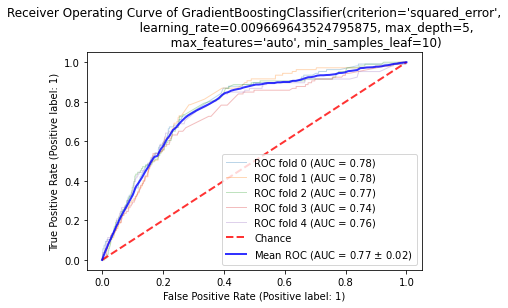

In [387]:
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
model_parameters = {'criterion': 'squared_error', 
                 'learning_rate': 0.009669643524795875, 
                'loss': 'deviance', 
               'max_depth': 5, 
               'max_features': 'auto', 
                'min_samples_leaf': 10, 
               'min_samples_split': 2, 
               'n_estimators': 100}

opt_model = GradientBoostingClassifier(**model_parameters)
plot_roc(opt_model, cv ,X_train_scaled,y_train)

## Part III: Kaggle Competition Submition

In [388]:
feat_importances=pd.Series(opt_model.feature_importances_,index=X_train.columns)
most_important_features = feat_importances.sort_values(ascending=False)[:100].index

In [390]:
opt_cls_pipeline.fit(X_train.loc[:,most_important_features], y_train)
opt_cls_pipeline.set_params(**parameters)
y_pred = opt_cls_pipeline.predict_proba(mailout_test.loc[:,most_important_features])

In [391]:
predictions = pd.DataFrame()
predictions['LNR']=mailout_test['LNR']
predictions['RESPONSE']=y_pred[:,1]

In [392]:
predictions.to_csv('Arvato_kaggle_predictions.csv',index=False)

Many Submissions submitted to Kaggle competetion and a different number of features were selected to fit the model and make the predictions.

**After Submitting the prediction sheet to Kaggle competetion, the best score achieved is 0.79589**